# Web Intelligence Final Project

### Submitted By
Igor Kuzmin, U217661 <br/>
Tobias Glaninger, U218166

### Repository
All the code and the data used for this project can be found in this repository. (https://github.com/igorktech/lyrics-sentiment-analysis)

### Introduction & Motivation
This project examines the development of the most popular songs of the last 20 years. Both of us have an interest in music and the connected culture. Therefore we came up with the idea to exmaine its development. <br/><br/>

In order to examine the development of music we decided to follow this procedure:
1. Data Collection <br/>
As data source for the most popular songs we decided to go with the billboard hot 100. We used the billboard.py python package, which uses BeautifulSoup under the hood to extract the charts from billboard. We collect the list of popular songs per week for the last 20 years. <br/>
Afterwards we use the song titles and the artists to collect the lyrics of the songs from the Genius API. Furthermore we also collect annotations to the lyrics. <br/>
Additionally, we collected information about the popularity of the songs by collecting the number of streams on Spotify and the views on YouTube.
2. Word Cloud <br/>
As a first analysis we look at the words which appear often in the lyrics of the last 20 years. We use WordClouds to visualize data from all lyrics, lyrics without bad words and lemmas of the words. The list of bad words we take from a recommendation for Facebook moderators (https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/).
3. Data Statistics <br/>
The second analysis focuses on the textual data. In this chapter we analyze the lyrics for example to find the development of the use of bad words or the length of song texts in general.
4. Sentiment Analysis <br/>
Next in this project you can find a chapter containing sentiment analysis of the song texts. We used three different lexicons to collect information about sentiment. The vader (https://www.kaggle.com/datasets/nltkdata/vader-lexicon?resource=download) and valence lexicons (https://saifmohammad.com/WebDocs/Lexicons/NRC-VAD-Lexicon.zip) rank the words on a different scale, but we change the scale from 0 to 1 to make the two comparable. Furthermore, we use the Liu and Hu opinion lexicon encooperated in the nltk package to calculate the sentiment of the songs. <br/>
After calculating the sentiment of each song we examine the development over the years. <br/>
As the sentiment lexicon are for English language and most songs are in English we extract the language of all the lyrics to filter for English lyrics only.
5. Using Wikipedia and OpenStreetMap to Visualize the Birthlocations of the top artists <br/>
We also wanted to examine the origin of the top artists. For this we used SPARQL queries on Wikidata to find the birth locations of the artists. After retrieving the locations, we visualize them on an interactive map powered by OpenStreetMap.
6. Topic Modelling <br/>
We use the LDA algorithm to examine how many distinct topics can be found in the 20 years of lyrics. Therefore we convert the lyrics to a bag of words.
7. Fancy AI Models <br/>
In this chapter we played around with multiple state-of-the art approaches on NLP. For example we trained a transformer model to generate lyrics annotations automatically. More approaches can be found in this chapter.
8. Telegram Bot to create lines <br/>
We also build a Markov model to create new lyrics from the existing lyrics and connected it to a Telegram bot which can produce lines from the lyrics.

## Conclusions, limitations and ideas for future work.

Our work shows that the average sentiment stayed realtively constant over the last 20 years. Also it showed that there are only slight changes between the months in average so phenomena like happy summer or Christmas songs could not be confirmed by this research. <br/>
This research also shows that the hot 100 billboard songs have a clear bias towards artists originating from the US, especially from the East Coast. <br/>
Furthermore this piece of work has shown that the music business has become faster. There are more distinct songs in the hot 100 in an average year than 10 or 20 years ago. This means that songs tend to stay shorter in this list. <br/>
Limitations are already mentioned in the analyses of the result and mainly focus on the quality of the data. As we are working with several search engine results we can not guarantee that for example the views from the YouTube videos are taken from the correct video. Of course we try to make the search query as precise as possible but there might still be room for errors. <br/>
The experiments with AI models like transformers have shown the potential of such models for the future. Nowadays many voluntary people write annotations to lyrics manually in order to help other people in understanding the song texts. This job can be automatised or at least suggestions can be made by such models. This is one field which is definitely worth putting more effort into as it can help many music enthusiasts like us. 

# Setup

In [19]:
!pip install -U pip setuptools wheel --quiet

In [1]:
!pip install torch --quiet
!pip install sklearn --quiet
!pip install datasets --quiet
!apt install git-lfs --quiet
!pip install transformers --quiet
!pip install sentencepiece --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt' is not recognized as an internal or external command,
operable program or batch file.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install markovify --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install rouge --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install fasttext --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install nltk --quiet
!pip install gensim --quiet
!pip install -U spacy==2.3.9 --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!python -m spacy download en --quiet

symbolic link created for C:\Users\ik76\Documents\GitHub\lyrics-sentiment-analysis\venv\lib\site-packages\spacy\data\en <<===>> C:\Users\ik76\Documents\GitHub\lyrics-sentiment-analysis\venv\lib\site-packages\en_core_web_sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[+] Linking successful
C:\Users\ik76\Documents\GitHub\lyrics-sentiment-analysis\venv\lib\site-packages\en_core_web_sm
-->
C:\Users\ik76\Documents\GitHub\lyrics-sentiment-analysis\venv\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!python -m spacy download en_core_web_sm --quiet

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install ipympl --quiet
!pip install mpld3 --quiet
!pip install scikit-learn --quiet
!pip install statsmodels --quiet
!pip install scipy --quiet
!pip install wordcloud --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice

In [8]:
!pip install plotly --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install SPARQLWrapper --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install beautifulsoup4 --quiet
!pip install lyricsgenius --quiet
!pip install billboard.py --quiet
!pip install spotipy --quiet
!pip install wikipedia --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install pyLDAvis --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install pyTelegramBotAPI --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install fuzzywuzzy --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install python-dotenv

cannot find .env file



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import Genious access token

In [ ]:
from dotenv import load_dotenv
import dotenv
import os
%load_ext dotenv
%dotenv
load_dotenv(os.path.join(os.getcwd(),'.env'))
GENIOUS_ACCESS_TOKEN = os.environ.get('GENIOUS_ACCESS_TOKEN')
SPOTIFY_APP_CLIENT_ID = os.environ.get('SPOTIFY_APP_CLIENT_ID')
SPOTIFY_APP_CLIENT_SECRET = os.environ.get('SPOTIFY_APP_CLIENT_SECRET')

In [17]:
from IPython.display import HTML, display

# Utils
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
import sys
import re
import ast
import os
import pickle
import json

# Plots
from wordcloud import WordCloud,ImageColorGenerator

%matplotlib notebook
%matplotlib inline
# %matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mpld3

# Data collecting
import lyricsgenius as genius
import billboard
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Data processing
import nltk
if not nltk.data.find('corpora/stopwords'):
    # Download the 'stopwords' dataset
    nltk.download('stopwords')
from nltk.corpus import stopwords

# Sentiment
if not nltk.data.find('corpora/opinion_lexicon'):
    # Download the 'opinion_lexicon' dataset
    nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
import fasttext
import spacy
import statsmodels.api as sm

# MAP
import wikipedia
import plotly.express as px
from SPARQLWrapper import SPARQLWrapper, JSON, SPARQLExceptions

# LDA
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

# for t5
import torch
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from transformers import T5ForConditionalGeneration, T5Tokenizer
import random
from tqdm.auto import tqdm, trange
from huggingface_hub import notebook_login
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# W2v
import torch
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# Text generation
import markovify

# Deploy bot
import telebot
from telebot import types, apihelper
# Levenshtein metric
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [18]:
def disable_pandas_warnings():
    import warnings
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.*indexing past lexsort depth may impact performance*')

In [19]:
disable_pandas_warnings()

# Data Collection

In [ ]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days // 7)):
        yield start_date + timedelta(n*7)

In [ ]:
def collect_songs_from_billboard_each_day(start_date_str, end_date_str, chart_name='hot-100', table_path = None,to_csv = False):
    start_date = datetime.strptime(
        start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    columns = ["Rank",
                    "Song Title",
                    "Artist",
                    "Date",
                    "Year"]
    dataset = pd.DataFrame(columns = columns, data = [])
    if to_csv:
        dataset.to_csv(table_path,index=False)

    sys.stdout.write(
        "\r" + "Collecting Songs from " + start_date_str + " to " + end_date_str + " via https://www.billboard.com")
    sys.stdout.flush()
    for single_date in tqdm(daterange(start_date, end_date)):
        print(single_date.strftime('%Y-%m-%d'))
        chart = billboard.ChartData(chart_name, date=single_date.strftime('%Y-%m-%d'))
        for song in chart:
            row = {
                "Rank": song.rank,
                "Song Title": song.title,
                "Artist": song.artist,
                "Date": single_date.strftime('%Y-%m-%d'),
                "Year": single_date.strftime('%Y')
            }
            if to_csv:
                pd.DataFrame([row]).to_csv(table_path, mode='a',index=False, header=False)
            else:
                dataset = dataset.append(row, ignore_index=True)  #pd.concat([dataset,pd.DataFrame(row)],ignore_index=True)#
    if not to_csv:
        return dataset


In [ ]:
all_songs = collect_songs_from_billboard_each_day('2003-02-17', '2023-02-17',table_path='content/all_songs_20.csv',to_csv = True)

In [ ]:
all_songs = pd.read_csv("content/all_songs_20.csv")

In [ ]:
all_songs.head(70)

Rank                 Song Title                              Artist  \
0      1                 All I Have  Jennifer Lopez Featuring LL Cool J   
1      2                 In Da Club                             50 Cent   
2      3                  Mesmerize           Ja Rule Featuring Ashanti   
3      4           Bump, Bump, Bump                      B2K & P. Diddy   
4      5             Cry Me A River                   Justin Timberlake   
..   ...                        ...                                 ...   
65    66              No Letting Go                        Wayne Wonder   
66    67               Make It Clap  Busta Rhymes Featuring Spliff Star   
67    68                 Can't Stop               Red Hot Chili Peppers   
68    69  What Happened To That Boy               Baby Featuring Clipse   
69    70               A.D.I.D.A.S.       Killer Mike Featuring Big Boi   

          Date  Year  
0   2003-02-17  2003  
1   2003-02-17  2003  
2   2003-02-17  2003  
3   2003-02-17  2003  
4   2003-02-17  2003  
..         ...   ...  
65  2003-02-17  2003  
66  2003-02-17  2003  
67  2003-02-17  2003  
68  2003-02-17  2003  
69  2003-02-17  2003  

[70 rows x 5 columns]

In [ ]:
all_songs["Artist"][all_songs['Artist'] == "Jackson 5"] = "The Jackson 5"
all_songs["Artist"][all_songs['Artist'] == "Beatles"] = "The Beatles"

In [ ]:
all_songs.drop_duplicates(subset=['Artist','Song Title']).to_csv('content/unique_songs_20.csv', mode='a',index=False)

In [ ]:
api = genius.Genius(GENIOUS_ACCESS_TOKEN,timeout = 5, sleep_time=0.015, verbose=False)

In [ ]:
all_songs = pd.read_csv("content/unique_songs_20.csv")

GENIOUS_CSV = 'content/all_songs_data_new.csv'
columns = [ "Year",
        "Rank",
        "Song Title",
        "Artist",
        "Primary Artists",
        "Lyrics",
        "Song URL",
        "Song id",
        "Song stats",
        "Song annotations"]
dataset = pd.DataFrame(columns = columns, data = [])
dataset.to_csv(GENIOUS_CSV,index=False)


all_song_data = pd.DataFrame()
start_time = datetime.now()
print("Started at {}".format(start_time))
for i in range(0, len(all_songs)):
    rolling_pct = int((i / len(all_songs)) * 100)
    # print(str(rolling_pct) + "% complete." + " Collecting Record " + str(i) + " of " +
    #       str(len(all_songs)) + ". Year " + str(all_songs.iloc[i]['Year']) + "." + " Currently collecting " +
    #       all_songs.iloc[i]['Song Title'] + " by " + all_songs.iloc[i]['Artist'] + " " * 50, end="\r")
    song_title = all_songs.iloc[i]['Song Title']
    song_title = re.sub(" and ", " & ", song_title)
    artist_name = all_songs.iloc[i]['Artist']
    artist_name = re.sub(" and ", " & ", artist_name)

    try:
        song = api.search_song(song_title, artist=artist_name)
        primary_artists = song.primary_artist
        song_lyrics = re.sub("\n", " ", song.lyrics)  #Remove newline breaks, we won't need them.
        song_url = song.url
        song_id = song.id
        song_stats = song.stats
        song_annotations = api.song_annotations(song.id)
    except:
        primary_artists = "null"
        song_lyrics = "null"
        song_url = "null"
        song_id = "null"
        song_stats = 'null'
        song_annotations = 'null'

    row = {
        "Year": all_songs.iloc[i]['Year'],
        "Rank": all_songs.iloc[i]['Rank'],
        "Song Title": all_songs.iloc[i]['Song Title'],
        "Artist": all_songs.iloc[i]['Artist'],
        "Primary Artists": primary_artists,
        "Lyrics": song_lyrics,
        "Song URL": song_url,
        "Song id": song_id,
        "Song stats": song_stats,
        "Song annotations": song_annotations
    }
    pd.DataFrame([row]).to_csv(GENIOUS_CSV, mode='a',index=False, header=False)
    # all_song_data = all_song_data.append(row, ignore_index=True)
end_time = datetime.now()
print("\nCompleted at {}".format(start_time))
print("Total time to collect: {}".format(end_time - start_time))


Started at 2023-03-18 15:38:32.176995

Completed at 2023-03-18 15:38:32.176995
Total time to collect: 5:20:57.880854


In [ ]:
all_song_data.tail(5)

Year  Rank                                   Song Title  \
6   2022     7                                    Kill Bill   
7   2022     8                                Feliz Navidad   
8   2022     9                                    Anti-Hero   
9   2022    10                                       Unholy   
10  2022    11  The Christmas Song (Merry Christmas To You)   

                    Artist                    Primary Artists  \
6                      SZA                       SZA, 0 songs   
7           Jose Feliciano            José Feliciano, 0 songs   
8             Taylor Swift              Taylor Swift, 0 songs   
9   Sam Smith & Kim Petras    Sam Smith & Kim Petras, 0 songs   
10           Nat King Cole  The Nat “King” Cole Trio, 0 songs   

                                               Lyrics  \
6   TranslationsEspañolPortuguêsItalianoTürkçeDeut...   
7   Feliz Navidad Lyrics[Letra de "Feliz Navidad"]...   
8   TranslationsPortuguêsEspañolTürkçeFrançais中文Ne...   
9   TranslationsFrançaisEspañolNederlandsDeutschال...   
10  The Christmas Song (Merry Christmas to You) (O...   

                                             Song URL  Song id  \
6             https://genius.com/Sza-kill-bill-lyrics  8616820   
7   https://genius.com/Jose-feliciano-feliz-navida...   623111   
8    https://genius.com/Taylor-swift-anti-hero-lyrics  8434253   
9   https://genius.com/Sam-smith-and-kim-petras-un...  8302862   
10  https://genius.com/The-nat-king-cole-trio-the-...  1717793   

                                           Song stats  
6   Stats('unreviewed_annotations, concurrents, ho...  
7     Stats('unreviewed_annotations, hot, pageviews')  
8   Stats('unreviewed_annotations, concurrents, ho...  
9   Stats('unreviewed_annotations, concurrents, ho...  
10    Stats('unreviewed_annotations, hot, pageviews')

In [ ]:
loaded_song_dataset = pd.read_csv("content/all_songs_data_new.csv")

In [ ]:
display(loaded_song_dataset.head())
display(loaded_song_dataset.tail())

Year  Rank        Song Title                              Artist  \
0  2003     1        All I Have  Jennifer Lopez Featuring LL Cool J   
1  2003     2        In Da Club                             50 Cent   
2  2003     3         Mesmerize           Ja Rule Featuring Ashanti   
3  2003     4  Bump, Bump, Bump                      B2K & P. Diddy   
4  2003     5    Cry Me A River                   Justin Timberlake   

           Primary Artists                                             Lyrics  \
0  Jennifer Lopez, 0 songs  All I Have Lyrics[Intro: Jennifer Lopez, Sampl...   
1                      NaN                                                NaN   
2         Ja Rule, 0 songs  Mesmerize Lyrics[Intro: Ja Rule] Haha, yeah Wh...   
3             B2K, 0 songs  Bump, Bump, Bump Lyrics[Intro: P. Diddy & B2K]...   
4                      NaN                                                NaN   

                                            Song URL  Song id  \
0  https://genius.com/Jennifer-lopez-all-i-have-l...  32015.0   
1                                                NaN      NaN   
2        https://genius.com/Ja-rule-mesmerize-lyrics  23989.0   
3       https://genius.com/B2k-bump-bump-bump-lyrics  32117.0   
4                                                NaN      NaN   

                                        Song stats  \
0  Stats('unreviewed_annotations, hot, pageviews')   
1                                              NaN   
2  Stats('unreviewed_annotations, hot, pageviews')   
3  Stats('unreviewed_annotations, hot, pageviews')   
4                                              NaN   

                                    Song annotations  
0  [('Oh-oh-oh\n Uh, baby, don’t go\n All my, all...  
1                                                NaN  
2  [('Haha, yeah\n Whattup ma? How you been?\n Ye...  
3  [('(Come on, it’s ”Pandemonium”, baby)', [['Th...  
4                                                NaN

Year  Rank                   Song Title                   Artist  \
9035  2023    80          The Black Seminole.               Lil Yachty   
9036  2023    86                Fin de Semana  Junior H X Oscar Maydon   
9037  2023    96                      Hey Mor     Ozuna Featuring Feid   
9038  2023    99  Never Gonna Not Dance Again                     P!nk   
9039  2023   100       Dancin' In The Country            Tyler Hubbard   

             Primary Artists  \
9035     Lil Yachty, 0 songs   
9036                     NaN   
9037          Ozuna, 0 songs   
9038           P!nk, 0 songs   
9039  Tyler Hubbard, 0 songs   

                                                 Lyrics  \
9035  TranslationsEspañol​the BLACK seminole. Lyrics...   
9036                                                NaN   
9037  Hey Mor Lyrics[Letra de "Hey Mor" ft. Feid]  [...   
9038  TranslationsItalianoNever Gonna Not Dance Agai...   
9039  Dancin’ In The Country Lyrics[Verse 1] Them ne...   

                                               Song URL    Song id  \
9035  https://genius.com/Lil-yachty-the-black-semino...  8763573.0   
9036                                                NaN        NaN   
9037            https://genius.com/Ozuna-hey-mor-lyrics  8400438.0   
9038  https://genius.com/P-nk-never-gonna-not-dance-...  8475909.0   
9039  https://genius.com/Tyler-hubbard-dancin-in-the...  8255170.0   

                                           Song stats  \
9035  Stats('unreviewed_annotations, hot, pageviews')   
9036                                              NaN   
9037  Stats('unreviewed_annotations, hot, pageviews')   
9038  Stats('unreviewed_annotations, hot, pageviews')   
9039             Stats('unreviewed_annotations, hot')   

                                       Song annotations  
9035  [('African Rambo with more ammo', [['John Jame...  
9036                                                NaN  
9037                                                 []  
9038  [('For once I wouldn’t start a fight', [['This...  
9039                                                 []

In [ ]:
songs_with_lyrics_dataset = loaded_song_dataset.dropna(subset=['Lyrics'])
songs_with_lyrics_dataset.to_csv('content/all_songs_no_null.csv',index=False)

### Spotify

In [ ]:
# Authenticate with Spotify API

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIFY_APP_CLIENT_ID,
                                                           client_secret=SPOTIFY_APP_CLIENT_SECRET))

def parse_spotify(df):
    df['Album Name'] = ''
    df['Release Date'] = ''
    df['Duration ms'] = ''
    df['Popularity'] = ''

    for index, row in tqdm(df.iterrows()):
        # try to clean everithing to make it easy reading for spotify
        artist = re.sub(r' &', ',',re.sub(r"'", r"",row['Primary Artists'].split(',')[0]))
        if index != 19:
            artist = re.sub(r"\.", '',artist)
        title = re.sub(r'\([^()]*\)', '',re.sub(r"'", r"",row['Song Title']))

        try:
            track  = sp.search(q="artist:" + artist + " track:" + title, type='track',limit=10)['tracks']['items'][0]

            df.at[index, 'Album Name'] = track['album']['name']
            df.at[index, 'Release Date'] = track['album']['release_date']
            df.at[index, 'Duration ms'] = track['duration_ms']
            df.at[index, 'Popularity'] = track['popularity']
        except:
            try:
                title  = re.sub(r'\"','',re.sub(r" Featuring",',',re.sub(r' &', ',',re.sub(r"'", r"",row['Artist'].split(',')[0]))))
                track  = sp.search(q="artist:" + artist + " track:" + title, type='track',limit=10)['tracks']['items'][0]


                df.at[index, 'Album Name'] = track['album']['name']
                df.at[index, 'Release Date'] = track['album']['release_date']
                df.at[index, 'Duration ms'] = track['duration_ms']
                df.at[index, 'Popularity'] = track['popularity']
            except:
                df.at[index, 'Album Name'] = "null"
                df.at[index, 'Release Date'] = "null"
                df.at[index, 'Duration ms'] = "null"
                df.at[index, 'Popularity'] = "null"

    return df

df = pd.read_csv('content/cleaned_songs.csv')
df = parse_spotify(df)
df.to_csv('content/cleaned_songs.csv',index=False)

## Data cleaning

* Clean lyrics and save to csv

In [11]:
# Define a regex pattern to match text before the word "Lyrics"
pattern = re.compile(r".*Lyrics", re.DOTALL)

# Define a function to clean the "Lyrics" column
def clean_lyrics(lyrics):
    # Remove all text before the word "Lyrics"
    cleaned_lyrics = re.sub(pattern, "Lyrics", lyrics)
    # Remove any text inside square brackets
    cleaned_lyrics = re.sub(r"\[.*?\]", "", cleaned_lyrics)
    # remove all occurances of word Lyrics
    cleaned_lyrics = re.sub(r"\bLyrics\b", "", cleaned_lyrics)
    cleaned_lyrics = re.sub(r"\bEmbed\b", "", cleaned_lyrics)
    cleaned_lyrics = re.sub(r"\bembed\b", "", cleaned_lyrics)
    # Return the cleaned lyrics
    return cleaned_lyrics

In [12]:
loaded_song_dataset = pd.read_csv("content/all_songs_no_null.csv")

# Apply the clean_lyrics function to the "Lyrics" column of the DataFrame
loaded_song_dataset["Lyrics"] = loaded_song_dataset["Lyrics"].apply(clean_lyrics)

# Save the cleaned DataFrame to a new CSV file
loaded_song_dataset.to_csv('content/cleaned_songs.csv', index=False)

## Data Augmentation

In [15]:
bad_word_file = 'content/Facebook Bad Words List 2022.txt'
with open(bad_word_file) as f:
    bad_words = f.read().split(",")

In [75]:
def clean_profanity_lyrics(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', ' ', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', ' ', clean_text).lower()
    # remove exctra spaces
    cleaned_lyrics = re.sub(' +', ' ', cleaned_lyrics)
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    # Remove stop words
    words = [word for word in words if word not in bad_words]
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [76]:
def clean_non_profanity(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', ' ', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', ' ', clean_text).lower()
    # remove exctra spaces
    cleaned_lyrics = re.sub(' +', ' ', cleaned_lyrics)
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    # Remove stop words
    words = [word for word in words if word in bad_words]
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)


In [77]:
def tokenize_lyrics(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', ' ', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', ' ', clean_text).lower()
    # remove exctra spaces
    cleaned_lyrics = re.sub(' +', ' ', cleaned_lyrics)
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    return ' '.join(words)

In [78]:
df = pd.read_csv("content/cleaned_songs.csv")

df['Tokenized Lyrics'] = df['Lyrics'].apply(tokenize_lyrics)
df['Cleaned Lyrics'] = df['Lyrics'].apply(clean_profanity_lyrics)
df['Bad Words'] = df['Lyrics'].apply(clean_non_profanity)
df.to_csv('content/cleaned_songs.csv', index=False)

In [79]:
def split_to_list_of_words(lyrics):
  return lyrics.split(' ')

In [81]:
df = pd.read_csv("content/cleaned_songs.csv")
df['Cleaned Lyrics List'] = df['Cleaned Lyrics'].apply(split_to_list_of_words)
df.to_csv('content/cleaned_songs.csv', index=False)

In [82]:
def make_bigrams(lyrics):
    return [bigram_mod[doc] for doc in lyrics]

def make_trigrams(lyrics):
    return [trigram_mod[bigram_mod[doc]] for doc in lyrics]

def lemmatization(lyrics, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in lyrics:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [83]:
# Build the bigram and trigram models
data_words =  pd.read_csv('content/cleaned_songs.csv')['Cleaned Lyrics List'].apply(ast.literal_eval)
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [88]:

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#! python3 -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
df['Lemmatizated lyrics'] = data_lemmatized

# save progress
df.to_csv('content/cleaned_songs.csv', index=False)
print(data_lemmatized[:1])

[['life', 'life', 'live', 'special', 'love', 'baby', 'go', 'love', 'baby', 'go', 'special', 'baby', 'go', 'love', 'baby', 'go', 'baby', 'go', 'love', 'understand', 'baby', 'go', 'actin', 'shame', 'leave', 'take', 'way', 'mistreat', 'crazy', 'baby', 'come', 'matter', 'phase', 'believe', 'leave', 'believe', 'last', 'real', 'kiss', 'bounce', 'baby', 'let', 'talk', 'man', 'well', 'son', 'want', 'baby', 'get', 'leave', 'alone', 'come', 'cause', 'good', 'holding', 'spot', 'good', 'reppin', 'girl', 'block', 'go', 'baby', 'good', 'get', 'thing', 'lock', 'fine', 'come', 'baby', 'pride', 'pride', 'baby', 'girl', 'need', 'bad', 'easy', 'make', 'decision', 'mad', 'path', 'choose', 'run', 'alone', 'know', 'independent', 'make', 'home', 'time', 'essence', 'spend', 'alone', 'might_also', 'night', 'wait', 'promise', 'make', 'come', 'much', 'time', 'waste', 'replace', 'make', 'cat', 'nervous', 'thought', 'settle', 'especially', 'creepin', 'town', 'creepin', 'think', 'tender', 'touch', 'could', 'lock', 

In [ ]:
# Detect Language

model = fasttext.load_model('content/lid.176.ftz')

predicted_lang = model.predict(df["Cleaned Lyrics"].values.tolist(), k=1)[0]
lang_codes = [lang[0][-2:] for lang in predicted_lang]

df["lang"] = lang_codes

# Word Cloud

## Whole Dataset

In [26]:
%matplotlib inline

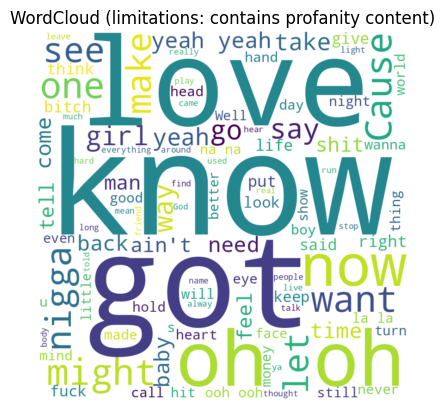

In [52]:
# Create and generate a word cloud image:
df = pd.read_csv("content/cleaned_songs.csv")
lyrics_text = ' '.join(df['Lyrics'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud (limitations: contains profanity content)")
plt.show()

## Profanity filtered

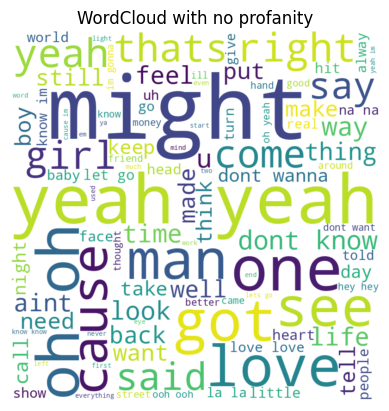

In [54]:
def clean(lyrics):
    lyrics = ' '.join([re.sub(r"embed$", "", e) for e in lyrics.split(' ')])
    return  lyrics

df = pd.read_csv("content/cleaned_songs.csv")
lyrics_text = ' '.join(df['Cleaned Lyrics'].apply(clean))

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud with no profanity")
plt.show()

## Lemmas

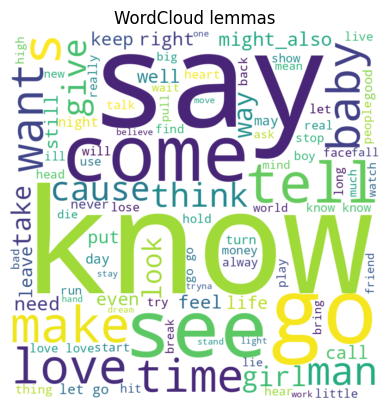

In [56]:
def join_to_string(lyrics):
  return " ".join(lyrics)

lyrics_text = ' '.join(pd.read_csv('content/cleaned_songs.csv')['Lemmatizated lyrics'].apply(ast.literal_eval).apply(join_to_string))

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
# %matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud lemmas")
plt.show()

# Data Statistics

### Preparation

In [114]:
def split(lyrics):
    return lyrics.split(' ')

In [115]:
data =  pd.read_csv('content/cleaned_songs.csv')
# Create a new DataFrame with the year, number of songs, number of unique words, and average number of words per song for each year
year_stats = pd.DataFrame(columns=['Year', 'Num Songs', 'Num Unique Words', 'Avg Words Per Song'])
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    num_songs = len(year_data)
    all_words = []
    unique_words = set()
    for lyrics in year_data['Tokenized Lyrics'].apply(split):
        all_words += lyrics
        unique_words.update(lyrics)
    num_unique_words = len(unique_words)
    avg_words_per_song = len(all_words) / num_songs
    year_stats = year_stats.append({'Year': year, 'Num Songs': num_songs, 'Num Unique Words': num_unique_words, 'Avg Words Per Song': avg_words_per_song}, ignore_index=True)

# Save the year_stats DataFrame to a CSV file
year_stats.to_csv('content/year_stats.csv', index=False)

In [116]:
# define custom function to count the number of words per row
def count_words(row):
    if pd.isna(row):
        return 0
    return len(row.split(' '))

In [117]:
df = pd.read_csv('content/cleaned_songs.csv')
year_stats = pd.read_csv('content/year_stats.csv')

# calculate average number of  words per year
df['Bad Words Count'] = df['Bad Words'].apply(count_words)
df['Cleaned Words Count'] = df['Cleaned Lyrics'].apply(count_words)
df['Tokens Count'] = df['Tokenized Lyrics'].apply(count_words)

new_df = df.groupby('Year')['Bad Words Count'].sum().values
year_stats["Bad Words Count"] = new_df

new_df = df.groupby('Year')['Cleaned Words Count'].sum().values
year_stats["Cleaned Words Count"] = new_df

new_df = df.groupby('Year')['Bad Words Count'].mean().values
year_stats["Avg Bad Words Per Year"] = new_df

new_df = df.groupby('Year')['Cleaned Words Count'].mean().values
year_stats["Avg Cleaned Words Per Year"] = new_df

year_stats.to_csv('content/year_stats.csv', index=False)


In [ ]:
from youtube_search import YoutubeSearch

all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")

all_views = []

results_dict = {}

for i in range(len(all_songs)):
    if all_songs["Rank"].iloc[i] > 10:
        all_views.append(None)
        continue
    title = all_songs["Song Title"].iloc[i]
    title += " "
    title += all_songs["Artist"].iloc[i]
    title += " song"
    print(title)
    if title in results_dict.keys():
        views = results_dict[title]
    else:
        results = YoutubeSearch(title, max_results=1).to_dict()

        print(results[0]["title"])

        views = int(results[0]["views"].replace(" views", "").replace(".", "").replace(" visualizaciones", ""))

    all_views.append(views)
    results_dict[title] = views

print(all_views)

In [77]:
all_songs["YouTube clicks"] = all_views

all_songs.to_csv("content/all_songs_20_incl_sentiment.csv", index=False)

### Songs per Year

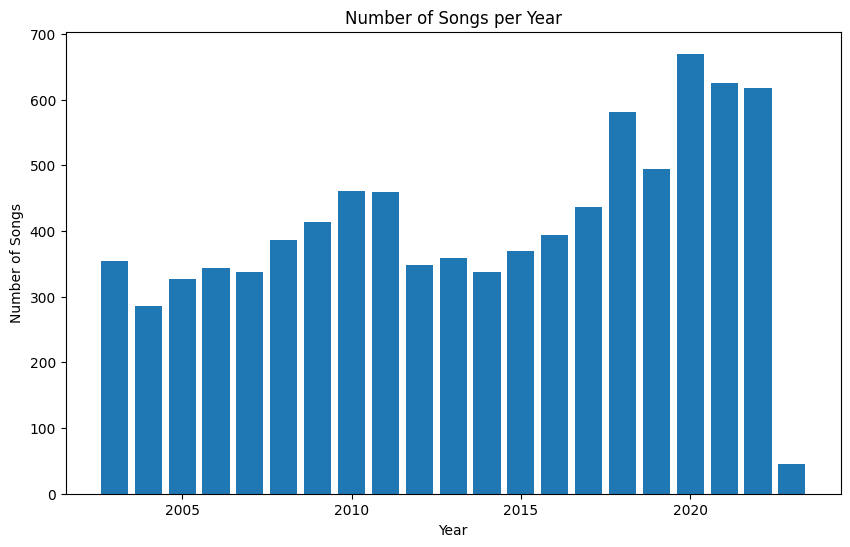

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Num Songs'])
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

The graph above shows the development over the last 20 years of the number of distinct songs in the billboard hot 100 list over the years. It can be seen that the number of distinct songs grew between 2004 and 2011, but dropped afterwards. From 2012 to 2020 there has also been a significant growth. This chart supports the thesis that songs stay popular for a shorther time in recent years and therefore more songs make it to the top 100. Also this supports the thesis that the output of hot 100 songs has risen in the past 10 years.

### Average Words per Year

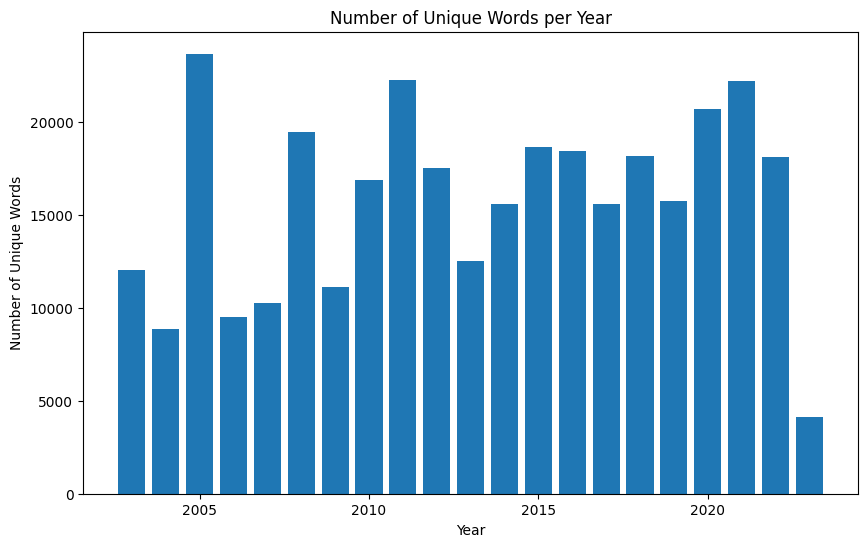

In [57]:
year_stats = pd.read_csv('content/year_stats.csv')
plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Num Unique Words'])
plt.title('Number of Unique Words per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Words')
plt.show()

The number of distinct words in the past 20 years doesn't show a clear trend. There are years that differ a lot from the other years in the number of different words used in all the lyrics. For example in the years 2005, 2008, and 2011 far more words were used than in the years around. Ignoring the outliers, a slight trend to more unique words in recent years can be recognized. This could be explained by the fact that more songs from different languages became popular in the last years.

### Words per Song

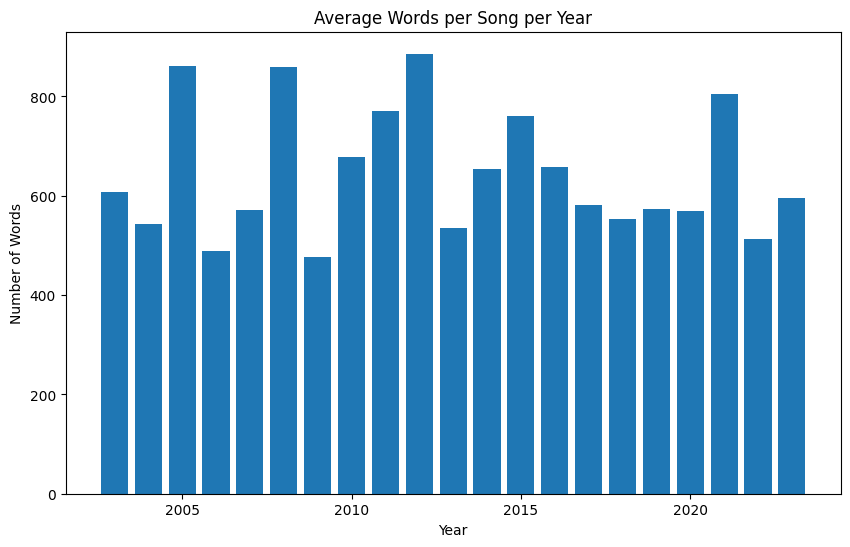

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Avg Words Per Song'])
plt.title('Average Words per Song per Year')
plt.xlabel('Year')
plt.ylabel('Number of Words')
plt.show()

The average number of words per song has not changed a lot in the past 20 years. Nevertheless, there are years in which the average is higher. The songs contain around 500 to 600 words on average over the last 20 years.

### Profanity Words

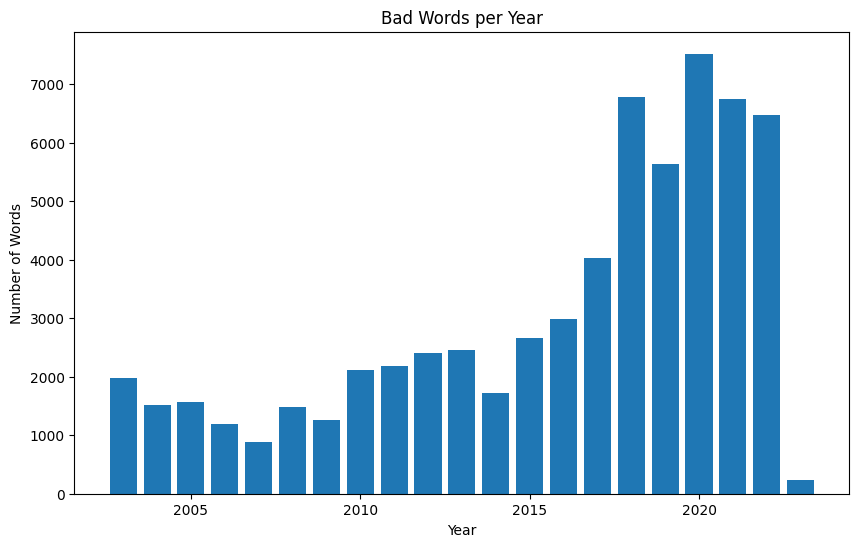

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Bad Words Count'])
plt.title('Bad Words per Year')
plt.xlabel('Year')
plt.ylabel('Number of Words')
plt.show()

To examine the use of profanity words, a list of words for the Facebook Page Moderation has been taken. It can be seen that the use of these words has risen a lot since 2016. The graph above shows that the use of bad words has doubled in the time from 2016 to 2020.

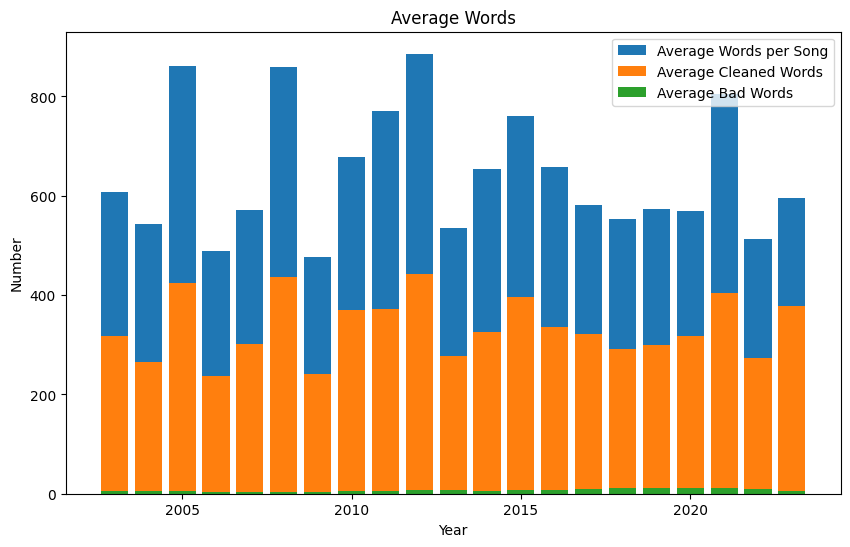

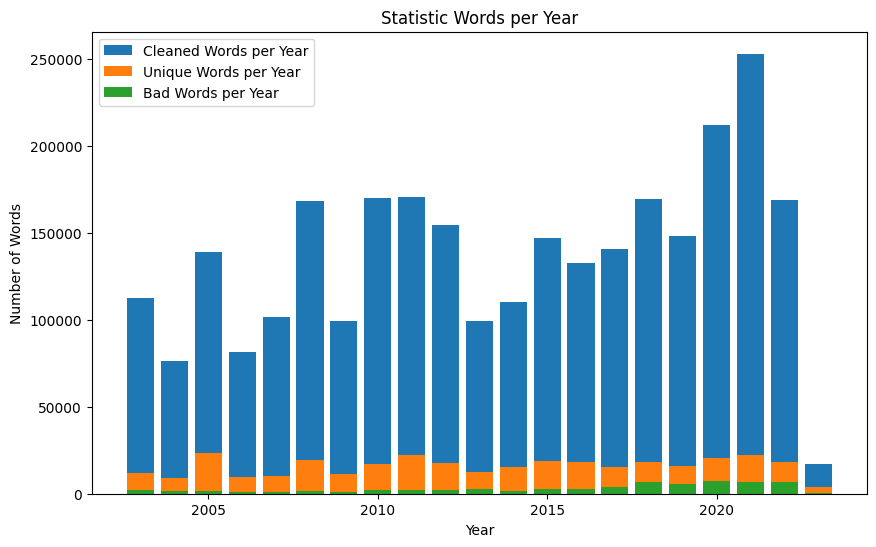

In [119]:
# Plot the year_stats DataFrame as a bar chart
year_stats = pd.read_csv('content/year_stats.csv')

plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Avg Words Per Song'],label='Average Words per Song')
plt.bar(year_stats['Year'], year_stats['Avg Cleaned Words Per Year'],label='Average Cleaned Words')
plt.bar(year_stats['Year'], year_stats['Avg Bad Words Per Year'],label='Average Bad Words')

plt.title('Average Words')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Cleaned Words Count'],label='Cleaned Words per Year')
plt.bar(year_stats['Year'], year_stats['Num Unique Words'],label='Unique Words per Year')
plt.bar(year_stats['Year'], year_stats['Bad Words Count'],label='Bad Words per Year')

plt.title('Statistic Words per Year')
plt.xlabel('Year')
plt.ylabel('Number of Words')
plt.legend()
plt.show()

### Spotify

In [34]:
songs_spotify = pd.read_csv('content/cleaned_songs.csv').dropna(subset=['Popularity'])
songs_spotify.to_csv('content/spotify_songs.csv',index=False)

KeyError: ['Popularity']

In [33]:
df = pd.read_csv('content/spotify_songs.csv')
d_s = df.groupby('Year')['Duration ms'].sum().values / (1000 * 60)
d_a = df.groupby('Year')['Duration ms'].mean().values / (1000 * 60)

p_a = df.groupby('Year')['Popularity'].mean().values

plt.figure(figsize=(10, 6))
plt.bar(df['Year'].unique(), d_s, label = "Sum")
plt.title('Minutes per Year')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(df['Year'].unique(), d_a, label = "Average")
plt.title('Average Minutes per Year')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(df['Year'].unique(), d_a/p_a)
plt.title('Average duration in minutes / Average Popularity per Year')
plt.xlabel('Year')
plt.ylabel('Average duration / Average Popularity')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'content/spotify_songs.csv'

### Languages

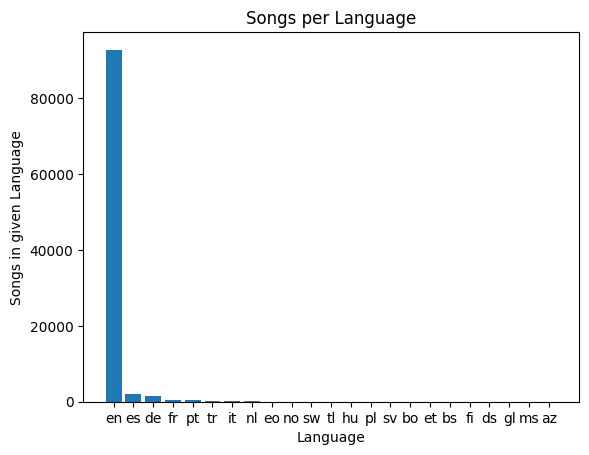

In [9]:
import matplotlib.pyplot as plt

all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")

languages = all_songs['lang'].value_counts()

lang_codes = []
lang_counts = []
for key, value in languages.items():
    lang_codes.append(key)
    lang_counts.append(value)

plt.bar(lang_codes, lang_counts)
plt.xticks(list(range(len(lang_codes))), lang_codes)
plt.xlabel("Language")
plt.ylabel("Songs in given Language")
plt.title("Songs per Language")
plt.show()

This graph shows that a huge share of the billboard hot 100 songs were written in English language. 

# Sentiment Analysis

In [2]:
df = pd.read_csv("content/cleaned_songs_incl_sentiment.csv")
all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")

In [15]:
#NRC Valence, Arousal, and Dominance Lexicon
#https://saifmohammad.com/WebDocs/Lexicons/NRC-VAD-Lexicon.zip
valences=pd.read_csv('content/valence-NRC-VAD-Lexicon.txt', sep="\t", names=["word", "sentiment_score"])

#VADER
#https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9
#https://www.kaggle.com/datasets/nltkdata/vader-lexicon?resource=download
vader_lexicon=pd.read_csv('content/vader_lexicon.txt', sep="\t", names=["word", "sentiment_score_wrong_scale", "_", "__"])
vader_lexicon["sentiment_score"]=[(score+4)/8 for score in vader_lexicon["sentiment_score_wrong_scale"]]

In [52]:
# modifiers that change the sentiment of a word
NEGATING_WORDS=["no", "not", "neither", "nor"]

def feature_extraction(df2):
    """
    calculates the features of data in place

    Parameters
    ----------
    data : pd.Dataframe
        data to calculate the features for.
    """
    print([len(df2["Lyrics"][i]) for i in range(len(df2["Lyrics"]))])
    df2["n_characters"] = [len(df2["Lyrics"][i]) for i in range(len(df2["Lyrics"]))]
    
    df2["sentiment_scores_valence"]=get_average_sentiment_scores_for_different_lexicons(df2["Tokenized Lyrics"], valences)
    df2["sentiment_scores_vader"]=get_average_sentiment_scores_for_different_lexicons(df2["Tokenized Lyrics"], vader_lexicon)



def get_average_sentiment_scores_for_different_lexicons(tokens, sent_lexicon):
    """
    calculates the average sentiment score of the tokens according to the provided sentiment lexicon

    Parameters
    ----------
    tokens : list of list of strings
        list of the tokens to calculate the average sentiment for.
    sent_lexicon : pd.Dataframe
        contains a single token (column "word") and a sentiment score (column "sentiment_score") per row.

    Returns
    -------
    average_valences : list of float
        the average sentiment score of the tokens.

    """
    average_sentiment_scores = []
    # one sequence in tokens is equivallent to cell in the dataframe
    for seq in tokens:
        seq = seq.split()
        print(seq)
        
        n_words_with_sentiment_score = 0
        sum_sentiment_scores=0
        
        # first token doesn't have predessors
        # important for negating words
        predecessor = ""
        prepredecessor = ""
        
        for index, token in enumerate(seq):
            # get the fitting row in the sent_lexicon
            row = sent_lexicon.loc[sent_lexicon['word'] == token]
            if len(row) > 0:
                # print(token)
                n_words_with_sentiment_score += 1
                word_sentiment_score = row.iloc[0].sentiment_score
                # print(word_sentiment_score)
                # negating words change the valence of the following words
                if predecessor in NEGATING_WORDS or prepredecessor in NEGATING_WORDS:
                    # 1-x calculates the oposite on a scale from 0 to 1
                    word_sentiment_score = 1-word_sentiment_score
                sum_sentiment_scores += word_sentiment_score
                
            prepredecessor = predecessor
            predecessor = token
        
        if n_words_with_sentiment_score > 0:
            average_sentiment_score = sum_sentiment_scores / n_words_with_sentiment_score
            print(n_words_with_sentiment_score)
        else:
            # if no word was found in the lexicon, the sentence has a neutral sentiment in total
            average_sentiment_score = 0.5
        
        average_sentiment_scores.append(average_sentiment_score)
    return average_sentiment_scores

In [ ]:
# extract the features of lyrics
feature_extraction(df)

In [55]:
df.to_csv("content/cleaned_songs_incl_sentiment.csv")

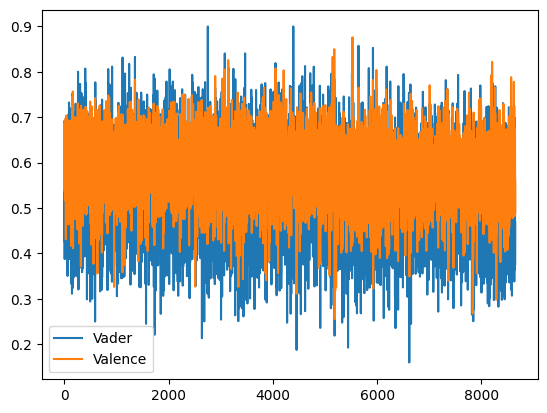

In [54]:
# df2.head

# for column in df2.columns:
#     print(column)

plt.plot(df["sentiment_scores_vader"], label = "Vader")
plt.plot(df["sentiment_scores_valence"], label = "Valence")
plt.legend()
plt.show()

In [83]:
df[df["lang"] == "en"].nlargest(10, 'sentiment_scores_vader')

Unnamed: 0  Year  Rank             Song Title  \
4392        4392  2014    87            Prayer In C   
5642        5642  2018    98                El Bano   
5920        5920  2018    44       Summertime Magic   
3468        3468  2012    91           Time Is Love   
3078        3078  2011    65       Isn't She Lovely   
1356        1356  2007    78          Not Fade Away   
1118        1118  2006    98              Sexy Love   
4050        4050  2013    80           Who You Love   
1244        1244  2006    99                Tu Amor   
4617        4617  2015    60  How Deep Is Your Love   

                                    Artist  \
4392              Lillywood & Robin Schulz   
5642  Enrique Iglesias Featuring Bad Bunny   
5920                      Childish Gambino   
3468                           Josh Turner   
3078                             Glee Cast   
1356                           Sheryl Crow   
1118                                 Ne-Yo   
4050       John Mayer Featuring Katy Perry   
1244                                   RBD   
4617             Calvin Harris & Disciples   

                                        Primary Artists  \
4392                                    Kiesza, 0 songs   
5642  Genius Hebrew Translations (תרגום לעברית), 0 s...   
5920                          Childish Gambino, 0 songs   
3468                               Josh Turner, 0 songs   
3078                                 Glee Cast, 0 songs   
1356                               Sheryl Crow, 0 songs   
1118                                     Ne-Yo, 0 songs   
4050                                John Mayer, 0 songs   
1244                                       RBD, 0 songs   
4617                 Calvin Harris & Disciples, 0 songs   

                                                 Lyrics  \
4392  "Heart-Shaped Box" - Nirvana  "Prayer In A C" ...   
5642   (One Love, One Love) כשראיתי אותך זה עצר הלב ...   
5920   You feel like summertime You took this heart ...   
3468   I know I gotta put in the hours Make the mone...   
3078   Isn't she lovely? Isn't she wonderful? Isn't ...   
1356  LyricsI'm gonna tell you how it's gonna be You...   
1118   My sexy love So sexy   She makes the hairs on...   
4050   You love, who you love Who you love You love,...   
1244   Mi amor, I'm not sure of the right words to s...   
4617   Ah-ooh, ooh, ah-ooh   I want you to breathe m...   

                                               Song URL    Song id  \
4392       https://genius.com/Kiesza-song-covers-lyrics   545564.0   
5642  https://genius.com/Genius-hebrew-translations-...  7229919.0   
5920  https://genius.com/Childish-gambino-summertime...  3831975.0   
3468  https://genius.com/Josh-turner-time-is-love-ly...   445701.0   
3078  https://genius.com/Glee-cast-isnt-she-lovely-l...  1567287.0   
1356  https://genius.com/Sheryl-crow-not-fade-away-l...  1094425.0   
1118          https://genius.com/Ne-yo-sexy-love-lyrics   141996.0   
4050  https://genius.com/John-mayer-who-you-love-lyrics   203995.0   
1244              https://genius.com/Rbd-tu-amor-lyrics   395202.0   
4617  https://genius.com/Calvin-harris-and-disciples...  2158086.0   

                                           Song stats  \
4392             Stats('unreviewed_annotations, hot')   
5642             Stats('unreviewed_annotations, hot')   
5920  Stats('unreviewed_annotations, hot, pageviews')   
3468             Stats('unreviewed_annotations, hot')   
3078             Stats('unreviewed_annotations, hot')   
1356             Stats('unreviewed_annotations, hot')   
1118  Stats('unreviewed_annotations, hot, pageviews')   
4050  Stats('unreviewed_annotations, hot, pageviews')   
1244             Stats('unreviewed_annotations, hot')   
4617  Stats('unreviewed_annotations, hot, pageviews')   

                                       Song annotations  \
4392  [('“Nobody To Love” - Sigma / “Doo Wop (That T...   
5642                                                 []   
5920  [('Got me b

In [82]:
df2 = df[df["lang"] == "en"].nlargest(10, 'sentiment_scores_valence')
df2

Unnamed: 0  Year  Rank                 Song Title  \
5527        5527  2017    85                        DNA   
3144        3144  2011    72  Love You Like A Love Song   
4050        4050  2013    80               Who You Love   
3078        3078  2011    65           Isn't She Lovely   
5986        5986  2018    99              Pete Davidson   
4207        4207  2014    47            Pills N Potions   
3147        3147  2011    97                 So In Love   
8184        8184  2022    12            Love You Better   
2894        2894  2010    59          Welcome Christmas   
3033        3033  2011    91                      Hello   

                                     Artist  \
5527                                    BTS   
3144               Selena Gomez & The Scene   
4050        John Mayer Featuring Katy Perry   
3078                              Glee Cast   
5986                          Ariana Grande   
4207                            Nicki Minaj   
3147  Jill Scott Featuring Anthony Hamilton   
8184                                 Future   
2894                              Glee Cast   
3033            Martin Solveig & Dragonette   

                           Primary Artists  \
5527                          BTS, 0 songs   
3144     Selena Gomez & The Scene, 0 songs   
4050                   John Mayer, 0 songs   
3078                    Glee Cast, 0 songs   
5986                Ariana Grande, 0 songs   
4207                  Nicki Minaj, 0 songs   
3147                   Jill Scott, 0 songs   
8184                       Future, 0 songs   
2894                    Glee Cast, 0 songs   
3033  Martin Solveig & Dragonette, 0 songs   

                                                 Lyrics  \
5527     첫눈에 널 알아보게 됐어 (Hmm-mm) 서롤 불러왔던 것처럼 (Ooh, oo...   
3144   (Rock Mafia)   It's been said and done Every ...   
4050   You love, who you love Who you love You love,...   
3078   Isn't she lovely? Isn't she wonderful? Isn't ...   
5986   Mmm, yeah, yuh   I thought you into my life (...   
4207   Pills and potions We're overdosin' I'm angry,...   
3147   I'm glad this week is over I need to get away...   
8184   Could this thing be more? You can never— this...   
2894   Oooh, ahhh... Fahoo fores, dahoo dores Welcom...   
3033   Hey Hey Hey Hey   I could stick around and ge...   

                                               Song URL    Song id  \
5527                  https://genius.com/Bts-dna-lyrics  3233281.0   
3144  https://genius.com/Selena-gomez-and-the-scene-...    75007.0   
4050  https://genius.com/John-mayer-who-you-love-lyrics   203995.0   
3078  https://genius.com/Glee-cast-isnt-she-lovely-l...  1567287.0   
5986  https://genius.com/Ariana-grande-pete-davidson...  3788156.0   
4207  https://genius.com/Nicki-minaj-pills-n-potions...   433309.0   
3147    https://genius.com/Jill-scott-so-in-love-lyrics  1533964.0   
8184   https://genius.com/Future-love-you-better-lyrics  7945039.0   
2894  https://genius.com/Glee-cast-welcome-christmas...   999805.0   
3033  https://genius.com/Martin-solveig-and-dragonet...   512262.0   

                                           Song stats  \
5527  Stats('unreviewed_annotations, hot, pageviews')   
3144  Stats('unreviewed_annotations, hot, pageviews')   
4050  Stats('unreviewed_annotations, hot, pageviews')   
3078             Stats('unreviewed_annotations, hot')   
5986  Stats('unreviewed_annotations, hot, pageviews')   
4207  Stats('unreviewed_annotations, hot, pageviews')   
3147  Stats('unreviewed_annotations, hot, pageviews')   
8184  Stats('unreviewed_annotations, hot, pageviews')   
2894             Stats('unreviewed_annotations, hot')   
3033  Stats('unreviewed_annotations, hot, pageviews')   

                                       Song annotations  \
5527  [('우리 만남은 (만남은)\n 수학의 공식 (수학의 공식)\n 종교의 율법 (율법...   
3144  [('(Rock Mafia)', [['Rock Mafia is the duo tha...   
4050  [('But you should see him when he shines\n You...   
3078                                          

In [53]:
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())

def score_sent(sent):
    """Returns a score btw -1 and 1"""
    sent = [e.lower() for e in sent.split(' ') if e.isalnum()]
    total = len(sent)
    pos = len([e for e in sent if e in positive_wds])
    neg = len([e for e in sent if e in negative_wds])
    if total > 0:
        return (pos - neg) / total
    else:
        return 0

In [64]:
# Uncomment if you need to merge two tables
df = pd.read_csv("content/cleaned_songs.csv")
df2 = pd.read_csv("content/cleaned_songs_incl_sentiment.csv")
df['n_characters'] = df2['n_characters']
df['sentiment_scores_valence'] = df2['sentiment_scores_valence']
df['sentiment_scores_vader'] = df2['sentiment_scores_vader']
df.to_csv('content/cleaned_songs.csv', index=False)

In [65]:
df = pd.read_csv("content/cleaned_songs.csv")
df['Sentiment Opinion Score'] = df['Cleaned Lyrics'].apply(score_sent)
df.to_csv('content/cleaned_songs.csv', index=False)

In [66]:
df = pd.read_csv('content/cleaned_songs.csv')
year_stats = pd.read_csv('content/year_stats.csv')

new_df = df.groupby('Year')['Sentiment Opinion Score'].mean().values
year_stats["Avg Sentiment Opinion Score per Year"] = new_df

new_df = df.groupby('Year')['sentiment_scores_valence'].mean().values
year_stats["avg_sentiment_scores_valence"] = new_df

new_df = df.groupby('Year')['sentiment_scores_vader'].mean().values
year_stats["avg_sentiment_scores_vader"] = new_df

year_stats.to_csv('content/year_stats.csv', index=False)



In [67]:
year_stats = pd.read_csv('content/year_stats.csv')

plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['Avg Sentiment Opinion Score per Year'])
plt.title('Avg Sentiment Opinion Score per Year (Pos-Neg)/Total')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(year_stats['Year'], year_stats['avg_sentiment_scores_valence'],label = 'avg_sentiment_scores_valence per Year')
plt.bar(year_stats['Year'], year_stats['avg_sentiment_scores_vader'],label = 'avg_sentiment_scores_vader per Year')
plt.title('Vader and Valence per Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(0.5, 0.5))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Analysis

In [18]:
song_titles = all_songs["Song Title"].values

def get_sentiment_score(song_titles, column):
    sentiment_scores= []
    for title in song_titles:
        score = df[df["Song Title"] == title][column]
        if len(score) == 0:
            score = None
        else:
            score = score.iloc[0]
        
        sentiment_scores.append(score)

    return sentiment_scores

print(song_titles[:5])

all_songs["Valence_Score"] = get_sentiment_score(song_titles, "sentiment_scores_valence")
print("valence finished")
all_songs["Vader_Score"] = get_sentiment_score(song_titles, "sentiment_scores_vader")


['All I Have' 'In Da Club' 'Mesmerize' 'Bump, Bump, Bump' 'Cry Me A River']
valence finished


In [26]:
# all_songs['Vader_Score'].value_counts(bins=10)
print(np.sum(all_songs["Vader_Score"].count()))
print(len(all_songs))

98090
104300


In [20]:
all_songs.to_csv("content/all_songs_20_incl_sentiment.csv", index=False)

In [ ]:
all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")
unique_songs = pd.read_csv("content/cleaned_songs_incl_sentiment.csv")

langs = []
for title in all_songs["Song Title"]:
    try:
        lang = unique_songs[unique_songs["Song Title"] == title]["lang"].iloc[0]
    except Exception as e:
        print(e)
        lang = None
    langs.append(lang)

all_songs["lang"] = langs

all_songs.to_csv("content/all_songs_20_incl_sentiment.csv", index=False)

### Sentiment Analysis over Years and Months

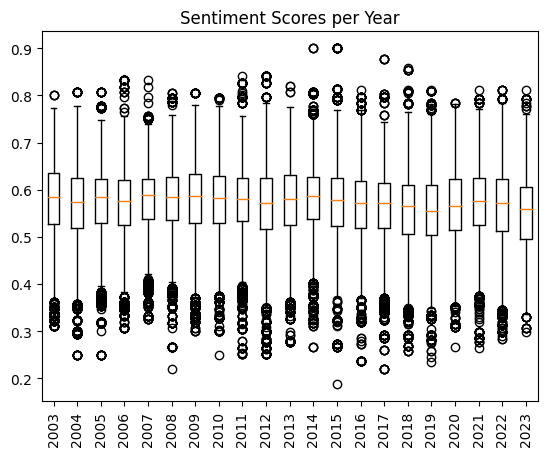

In [44]:
# filter for english songs because sentiment analysis only works for english songs
all_eng_songs = all_songs[all_songs["lang"] == "en"]

sentiments_per_year = []
for year in range(2003, 2024):
    all_sentiments = []

    all_sentiments.extend(all_eng_songs[all_eng_songs["Year"] == year]["Valence_Score"].values)
    all_sentiments.extend(all_eng_songs[all_eng_songs["Year"] == year]["Vader_Score"].values)

    sentiments_per_year.append(all_sentiments)

plt.boxplot(sentiments_per_year)
plt.xticks(list(range(1, 22)), list(range(2003, 2024)), rotation=90)
plt.title("Sentiment Scores per Year")
plt.show()

This boxplot shows all the sentiment scores of english songs gathered per year. It can be seen that the median is comparable over the years and only differs in a very small region. Interestingly, there are more outliers in the lower part than in the higher range of sentiments. This could mean that there are less sad songs but they tend to have a high degree of sadness.

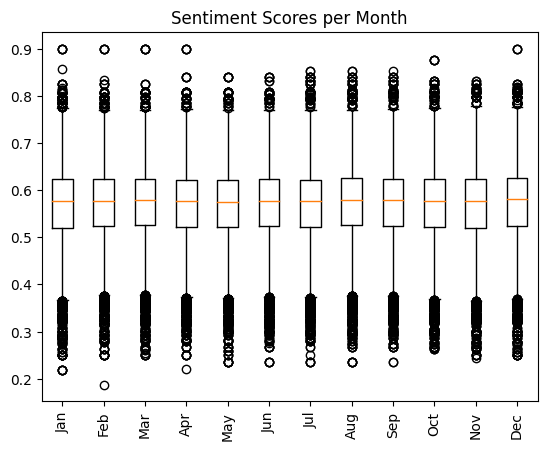

In [48]:
sentiments_per_month = []
for month in range(1, 13):
    all_sentiments = []

    if month < 10:
        date_string = "-0" + str(month) + "-"
    else:
        date_string = "-" + str(month) + "-"

    all_sentiments.extend(all_eng_songs[all_eng_songs["Date"].str.contains(date_string)]["Valence_Score"].values)
    all_sentiments.extend(all_eng_songs[all_eng_songs["Date"].str.contains(date_string)]["Vader_Score"].values)

    sentiments_per_month.append(all_sentiments)

plt.boxplot(sentiments_per_month)
plt.xticks(list(range(1, 13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.title("Sentiment Scores per Month")
plt.show()

The boxplot for the sentiment of the english songs grouped by month shows a very similar result. This can lead to the conclusion that over the last 20 years there cannot be drwan a conclusion that there are especially happy summer songs or that the recurring Christmas songs have a big impact on the overall sentiment.

# Using Wikipedia API to Get Map of Artists

## Get Birthplaces of the Artists

In [3]:
import requests
user_agent = "experimental code"
sparql = SPARQLWrapper("https://query.wikidata.org/sparql", agent=user_agent)


def get_SPARQL_results(query):
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    try:
        result = sparql.query()
        
        if result.response.status == 200:
            return result.convert()
        else:
            print(result.response.msg)

    except:
        print(query)
        return None

In [9]:
artists = all_songs["Artist"].unique()

print((artists))

wikipedia_search_terms = {}
for artist in artists:
    if "featuring" in artist.lower():
        search_term = artist.lower().split("featuring")[0]
    else:
        search_term = artist
    try:
        search_result = wikipedia.search(search_term)[0]
    except:
        search_result = None
    wikipedia_search_terms[artist] = search_result

search_terms = [wikipedia_search_terms[artist] for artist in all_songs["Artist"].values]

['Jennifer Lopez Featuring LL Cool J' '50 Cent'
 'Ja Rule Featuring Ashanti' ... 'Zach Bryan Featuring Maggie Rogers'
 'Junior H X Oscar Maydon' 'Ozuna Featuring Feid']


In [46]:
all_songs["Artist Search Term"] = search_terms
all_songs.to_csv("content/all_songs_20_incl_sentiment.csv", index=False)

In [ ]:
distinct_artists = all_songs["Artist Search Term"].unique()
print(distinct_artists)

query_with_placeholder = """
        SELECT distinct ?item ?itemLabel ?city ?coord WHERE{  
        ?item ?label "SEARCH_TERM"@en.  
        ?item wdt:P19 ?city.
        ?city wdt:P625 ?coord .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }    
        }
    """

birth_locs = {}

for search_term in distinct_artists:
    query = query_with_placeholder.replace("SEARCH_TERM", str(search_term))

    result = get_SPARQL_results(query)

    try:
        birth_loc = result["results"]["bindings"][0]["coord"]["value"].replace("Point(", "").replace(")", "")
        long, lat = birth_loc.split(" ")
        long = long.strip()
        
        birth_locs[search_term] = (long, lat)
    except Exception as e:
        print(e)
        birth_locs[search_term] = (None, None)


In [8]:
birth_locations = [birth_locs[artist] for artist in all_songs["Artist Search Term"].values]

longs = [birth_locs[artist][0] for artist in all_songs["Artist Search Term"].values]
lats = [birth_locs[artist][1] for artist in all_songs["Artist Search Term"].values]

print(longs)
print(lats)

# all_songs["Birth Location"] = birth_locations
all_songs["birth_long"] = longs
all_songs["birth_lat"] = lats
all_songs.to_csv("content/all_songs_20_incl_sentiment.csv", index=False)

['-73.873207', '-73.873207', '-73.762486111', None, '-89.971111111', '-77.383333333', '-74.144838888', '-87.95', '-76.29827', None, '-83.012986111', '-87.65005', '16.3725', '-81.103888888', '-97.733333333', '-73.873207', None, '-94.846638888', '-39.315', '-118.24368', None, '-73.2', None, None, None, '-84.8711', '-73.561666666', '-96.668333333', '-94.846638888', '-96.808888888', '-76.29827', None, None, '-73.941666666', '16.3725', None, '-118.009722222', None, '-111.380277777', '-77.036666666', '-73.990277777', None, '-74.444444444', '-118.195555555', '-122.080833333', '-94.141388888', '-75.163611111', None, '-73.873207', '-90.125', '-71.70605', None, '-73.941111111', None, None, '-2.149444444', '-80.754166666', None, None, None, None, None, '-73.917777777', '-77.036666666', '-83.95', '-76.65', '-73.93', None, None, '-84.390277777', '-81.103888888', None, '-83.03526', None, '-87.65005', None, '-2.733611111', '-75.163611111', '-117.946111111', '-73.990277777', '-82.878055555', '-84.3902

## Display all Artists on a Map

In [20]:
import plotly.express as px

all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")

all_songs.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

fig = px.scatter_mapbox(all_songs, 
                        lat="birth_lat", 
                        lon="birth_long", 
                        labels="Artist",
                        hover_name="Artist Search Term",
                        zoom=0, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The map above shows the places of birth of all the artists who got one of their songs on the billboard hot 100 in the last 20 years. The birth places are retrieved from Wikipedia. Unfortunately, especially for smaller artists the Wikipedia Search returns a different person, that's why their place of birth might be wrong. Another limitation of this approach is that only solo singers can be found, because groups don't have a place of birth.
In the map, a clear dominance of the East Coast of the USA can be seen. Other hotspots are in England, Japan and the West Coast of the USA.

## Top 1 Artists

In [21]:
all_songs = pd.read_csv("content/all_songs_20_incl_sentiment.csv")

top_artists = all_songs[all_songs["Rank"] == 1]

top_artists.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

fig = px.scatter_mapbox(top_artists, 
                        lat="birth_lat", 
                        lon="birth_long", 
                        labels="Artist",
                        hover_name="Artist Search Term",
                        zoom=0, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_7264\3658306656.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The map with the solo artists with at least one number one single on the billboard 100 shows a very similar result. The most dominant regions are the East Coast of the USA and England.

# Topic Modelling

## Data Analysis

In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import ast

In [3]:
import pandas as pd

data_lemmatized = pd.read_csv("content/cleaned_songs.csv")['Lemmatizated lyrics'].apply(ast.literal_eval)

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# filter out words which are not frequent or very frequent
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 11), (4, 1), (5, 1), (6, 27), (7, 4), (8, 3), (9, 2), (10, 10), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 4), (17, 1), (18, 10), (19, 1), (20, 1), (21, 2), (22, 4), (23, 4), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 6), (32, 6), (33, 1), (34, 2), (35, 4), (36, 1), (37, 2), (38, 4), (39, 1), (40, 1), (41, 1), (42, 5), (43, 2), (44, 2), (45, 1), (46, 3), (47, 1), (48, 7), (49, 4), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 5), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 8), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 4), (72, 1), (73, 1), (74, 2), (75, 1), (76, 2), (77, 4), (78, 2), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 1), (85, 3), (86, 1), (87, 1), (88, 5), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 3), (98, 1), (99, 6)]]


In [5]:
lda_models = dict()
num_topics_list = [5, 10, 15, 20, 25, 30]

# loop over the candidate numbers of topics
for num_topics in num_topics_list:
    # train an LDA model with the current number of topics
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    lda_models[num_topics] = lda_model
    # compute perplexity
    perplexity = lda_model.log_perplexity(corpus)
    # evaluate the coherence of the topics
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=data_lemmatized,
                                     dictionary=id2word,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # print stats
    print(f"Number of topics: {num_topics} \nPerplexity: {perplexity:.4f} \nCoherence score: {coherence_score:.4f}")

Number of topics: 5 
Perplexity: -6.8056 
Coherence score: 0.4213
Number of topics: 10 
Perplexity: -6.8108 
Coherence score: 0.3735
Number of topics: 15 
Perplexity: -8.4865 
Coherence score: 0.3816
Number of topics: 20 
Perplexity: -9.2025 
Coherence score: 0.3540
Number of topics: 25 
Perplexity: -9.7590 
Coherence score: 0.3561
Number of topics: 30 
Perplexity: -10.2951 
Coherence score: 0.3561


In [ ]:
# Save the dictionary of LDA models to a pickle file
with open('content/models_lda_dict.pkl', 'wb') as f:
    pickle.dump(lda_models, f)

In [136]:
with open('content/models_lda_dict.pkl', 'rb') as f:
    models_dict = pickle.load(f)

## Visualization

In [32]:
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

# Visualize the topics
pyLDAvis.enable_notebook()
# n = 25 has better Coherence score and at the same time Perplexity score
vis = pyLDAvis.gensim_models.prepare(lda_models[5], corpus, id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

c:\Users\tobia\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



# Understanding lyrics with T5 transformer

### Prepare model



In [ ]:
torch.cuda.empty_cache()

In [ ]:
MODEL_NAME = 'igorktech/t5-base-en'
SAVE_MODEL_NAME = 't5-base-en-explainer-10ep'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [ ]:
TRAIN_BATCH_SIZE = 16
EVAL_BATCH_SIZE = 4
REPORT_STEPS = 250
EPOCHS = 10
LEARNING_RATE = 1e-4
TASK_PREFIX = "explain | "
MAX_INPUT = 64
MAX_OUTPUT = 64
SPLIT_SIZE = 0.05
RANDOM_STATE = 42
# model.config.max_length = MAX_OUTPUT #not mandatory
SAVE_TO_HUB = True

In [ ]:
if SAVE_TO_HUB: 
    notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


### Prepare pairs of text for training

In [ ]:
pairs = []
df =  pd.read_csv('content/cleaned_songs.csv')['Song annotations'].apply(ast.literal_eval)

for index in range(len(df)):
    for tup in df[index]:

        new_tup = (tup[0], re.sub(r'http\S+', '', tup[1][0][0]))
        pairs.append(new_tup)

# # create a new DataFrame with the new list of tuples
new_df = pd.DataFrame(pairs, columns=['Lyrics', 'Description'])

In [ ]:
new_df.to_csv('content/lyrics_annotation_pairs.csv',index = False)

In [ ]:
data = pd.read_csv('content/lyrics_annotation_pairs.csv')

In [ ]:
data.dropna(subset=['Lyrics'])
data['Lyrics'] = data['Lyrics'].astype(str)
# Drop text in [brakets]
data = data[~data['Lyrics'].str.contains('^\[.*\]$')]
data.to_csv('content/lyrics_annotation_pairs.csv',index = False)

In [ ]:
data = pd.read_csv('content/lyrics_annotation_pairs.csv')
#drop tokens that are more than max output
data = data[data['Description'].str.count(' ') < MAX_OUTPUT]

In [ ]:
pairs = []
for a, b in zip(data['Lyrics'].astype(str), data['Description'].astype(str)):
    pairs.append((TASK_PREFIX + a, b))

In [ ]:
print(len(pairs))

25376


In [ ]:
# Split data into train and validation sets
train_pairs, val_pairs = train_test_split(pairs, test_size=SPLIT_SIZE, random_state=RANDOM_STATE)

### Training loop

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Define training and validation functions
def train(model, optimizer, tokenizer, train_pairs):
    model.train()
    losses = []
    for i in trange(0, int(len(train_pairs) / TRAIN_BATCH_SIZE)):
        batch = train_pairs[i * TRAIN_BATCH_SIZE: (i + 1) * TRAIN_BATCH_SIZE]
        
        x = tokenizer([p[0] for p in batch], return_tensors='pt', padding="longest", \
                      max_length=MAX_INPUT, truncation=True).to(model.device)
        y = tokenizer([p[1] for p in batch], return_tensors='pt', padding="longest", \
                      max_length=MAX_OUTPUT, truncation=True, ).to(model.device)
        y.input_ids[y.input_ids == 0] = -100
        loss = model(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
        if i % REPORT_STEPS == 0:
            print('train step', i, 'loss', np.mean(losses[-REPORT_STEPS:]))
            
    # Return training losses for plotting
    return losses

def evaluate(model, tokenizer, val_pairs):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i in trange(0, int(len(val_pairs) / EVAL_BATCH_SIZE)):
            batch = val_pairs[i * EVAL_BATCH_SIZE: (i + 1) * EVAL_BATCH_SIZE]
            x = tokenizer([p[0] for p in batch], return_tensors='pt', padding="longest", \
                          max_length=MAX_INPUT, truncation=True).to(model.device)
            y = tokenizer([p[1] for p in batch], return_tensors='pt', padding="longest", \
                          max_length=MAX_OUTPUT, truncation=True, ).to(model.device)
            y.input_ids[y.input_ids == 0] = -100
            loss = model(
                input_ids=x.input_ids,
                attention_mask=x.attention_mask,
                labels=y.input_ids,
                decoder_attention_mask=y.attention_mask,
                return_dict=True
            ).loss
            total_loss += loss.item()
        avg_loss = total_loss / int(len(val_pairs) / EVAL_BATCH_SIZE)
        print('validation loss', avg_loss)
        return avg_loss

# Train the model for multiple epochs and store losses
train_losses = []
val_losses = []
best_val_loss = float('inf')
for epoch in range(EPOCHS):
    print('EPOCH', epoch)
    random.shuffle(train_pairs)
    train_loss = train(model, optimizer, tokenizer, train_pairs)
    val_loss = evaluate(model, tokenizer, val_pairs)
    train_losses += train_loss
    val_losses.append(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'content/model.pt')


EPOCH 0


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 16.5843505859375
train step 250 loss 8.322848833084107
train step 500 loss 6.753389699935913
train step 750 loss 6.3192446937561035
train step 1000 loss 5.595619508743286
train step 1250 loss 4.9913691215515135
train step 1500 loss 4.74365193939209


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.899836804212456
EPOCH 1


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 4.495316982269287
train step 250 loss 4.529373239517212
train step 500 loss 4.437258695602417
train step 750 loss 4.360051228523254
train step 1000 loss 4.27372808265686
train step 1250 loss 4.252272123336792
train step 1500 loss 4.204789909362793


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.6351714472665395
EPOCH 2


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.7745885848999023
train step 250 loss 4.144819268226623
train step 500 loss 4.095548265457153
train step 750 loss 4.055730417251587
train step 1000 loss 4.012120845794677
train step 1250 loss 3.995784059524536
train step 1500 loss 3.9806493701934813


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.495262934958521
EPOCH 3


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.8327651023864746
train step 250 loss 3.913915831565857
train step 500 loss 3.886298041343689
train step 750 loss 3.864501208305359
train step 1000 loss 3.8555385732650755
train step 1250 loss 3.8159267263412477
train step 1500 loss 3.816633270263672


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.4078712816870174
EPOCH 4


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.8811450004577637
train step 250 loss 3.753407753944397
train step 500 loss 3.728291400909424
train step 750 loss 3.7128928775787355
train step 1000 loss 3.72125546169281
train step 1250 loss 3.6846557960510253
train step 1500 loss 3.674808027267456


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.3375237318995623
EPOCH 5


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.5113730430603027
train step 250 loss 3.601335569381714
train step 500 loss 3.622811385154724
train step 750 loss 3.58326136302948
train step 1000 loss 3.5801876974105835
train step 1250 loss 3.5707424058914183
train step 1500 loss 3.555393550872803


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.287563031404176
EPOCH 6


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.3548941612243652
train step 250 loss 3.490725429534912
train step 500 loss 3.4940056161880495
train step 750 loss 3.4633903942108155
train step 1000 loss 3.4761395034790037
train step 1250 loss 3.4818002729415896
train step 1500 loss 3.4468893098831175


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.244287702187379
EPOCH 7


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.3688926696777344
train step 250 loss 3.401930543899536
train step 500 loss 3.376886258125305
train step 750 loss 3.380571467399597
train step 1000 loss 3.3763328008651734
train step 1250 loss 3.374392021179199
train step 1500 loss 3.3710003356933593


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.2018338370398394
EPOCH 8


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.160048484802246
train step 250 loss 3.2973461704254152
train step 500 loss 3.278227430343628
train step 750 loss 3.300633418083191
train step 1000 loss 3.2978701429367066
train step 1250 loss 3.2696103248596193
train step 1500 loss 3.278291071891785


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.1668781429435175
EPOCH 9


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.115722179412842
train step 250 loss 3.209090753555298
train step 500 loss 3.211885629653931
train step 750 loss 3.2021121158599852
train step 1000 loss 3.204491805076599
train step 1250 loss 3.2027669982910156
train step 1500 loss 3.208041234970093


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.1419910060870535


In [ ]:
# Save progress
df = pd.DataFrame({
    'train_loss': train_losses
})
df.to_csv('content/t5_train_loss.csv')
df = pd.DataFrame({
    'val_loss': val_losses
})
df.to_csv('content/t5_val_loss.csv')

### Save model

In [ ]:
if SAVE_TO_HUB:
    model.push_to_hub(SAVE_MODEL_NAME)
    tokenizer.push_to_hub(SAVE_MODEL_NAME)
else:
    model.save_pretrained(SAVE_MODEL_NAME)
    tokenizer.save_pretrained(SAVE_MODEL_NAME)

pytorch_model.bin:   0%|          | 0.00/916M [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

spiece.model:   0%|          | 0.00/597k [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

### Plot Losses

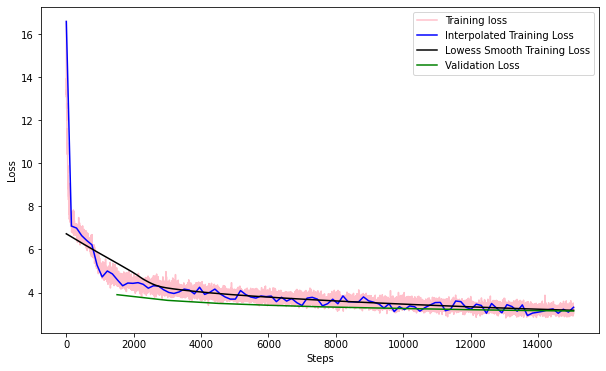

In [ ]:
# Plot 
plt.figure(figsize=(10, 6))
df = pd.read_csv('content/t5_train_loss.csv')
plt.plot(df.iloc[:, 0],df['train_loss'],color = 'pink', label='Training loss')

f = interp1d(df.iloc[:, 0], df['train_loss'], kind='quadratic')
# create a new array of step values for the interpolated data
x_new = np.linspace(df.iloc[:, 0].min(), df.iloc[:, 0].max(), num=100)
# evaluate the interpolated function at the new step values
train_loss_interp = f(x_new)
plt.plot(x_new, train_loss_interp, color = 'blue', label='Interpolated Training Loss')

y_lowess = sm.nonparametric.lowess(df['train_loss'], df.iloc[:, 0], frac = 0.3)  # 30 % lowess smoothing
plt.plot(y_lowess[:, 0], y_lowess[:, 1], color = 'black', label = 'Lowess Smooth Training Loss')  # some noise removed

df = pd.read_csv('content/t5_val_loss.csv')
plt.plot((df.iloc[:, 0]+1)*int(len(pairs)*(1-SPLIT_SIZE)/TRAIN_BATCH_SIZE), df['val_loss'], color = 'green', label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing model

In [ ]:
TEST_MODEL_NAME = 'igorktech/t5-base-en-explainer-10ep'
model = T5ForConditionalGeneration.from_pretrained(TEST_MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(TEST_MODEL_NAME)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [ ]:
model.eval()

def explain(x, **kwargs):
    inputs = tokenizer(x, return_tensors='pt').to(model.device)
    with torch.no_grad():
        hypotheses = model.generate(**inputs, **kwargs)
    return tokenizer.decode(hypotheses[0], skip_special_tokens=True)

In [ ]:
print('prediction: ', explain(TASK_PREFIX + 'What is love?'))

prediction:  This is a reference to the song “What is Love?” by Drake.


In [ ]:
reference = [p[1].split(' ') for p in val_pairs]

In [ ]:
candidate = []

for p in tqdm(val_pairs):
  candidate.append(explain(TASK_PREFIX +p[0]).split(' '))

  0%|          | 0/1269 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame({'Reference':[p[1] for p in val_pairs], 'Candidate': [' '.join(c) for c in candidate]})
df.to_csv('t5_predictions.csv',index = False)

### BLEU score

In [ ]:
# Set weights for n-gram
weights = [(1, 0, 0, 0),  # 1-gram
           (0.5, 0.5, 0, 0),  # 2-gram
           (0.33, 0.33, 0.33, 0),  # 3-gram
           (0.25, 0.25, 0.25, 0.25)]  # 4-gram


# Compute BLEU score
grams_bleu_dict = dict()
for i in range(len(weights)):
  bleu_scores = []
  for j in range(len(reference)):
    bleu_scores.append(sentence_bleu([reference[j]], candidate[j], weights=weights[i]))
  grams_bleu_dict[i+1] = bleu_scores

# Save the dictionary of different BLEU to a pickle file
with open('t5_model_n_gram_bleu_dict.pkl', 'wb') as f:
    pickle.dump(grams_bleu_dict, f)

In [158]:
with open('t5_model_n_gram_bleu_dict.pkl', 'rb') as f:
    model_bleu_dict = pickle.load(f)

In [159]:
for i in range(4):
  # Compute the mean of the BLEU scores using numpy:
  mean_bleu = np.mean(model_bleu_dict[i+1])
  # Compute average:
  avg_bleu = np.average(model_bleu_dict[i+1])
  print(f"Mean BLEU score for {i+1}-gram: ", mean_bleu)
  print(f"Average BLEU score for {i+1}-gram: ", avg_bleu)

Mean BLEU score for 1-gram:  0.05014265308566704
Average BLEU score for 1-gram:  0.05014265308566704
Mean BLEU score for 2-gram:  0.014084229795258894
Average BLEU score for 2-gram:  0.014084229795258894
Mean BLEU score for 3-gram:  0.00507945063775178
Average BLEU score for 3-gram:  0.00507945063775178
Mean BLEU score for 4-gram:  0.0018883290628454446
Average BLEU score for 4-gram:  0.0018883290628454446


### ROUGE score

In [ ]:
df = pd.read_csv('content/t5_predictions.csv')

In [ ]:
rouge = Rouge()
scores = rouge.get_scores(df['Candidate'], df['Reference'])
print("ROUGE: ", scores)
scores = rouge.get_scores(df['Candidate'], df['Reference'], avg=True)
print("AVG ROUGE: ", scores)

ROUGE:  [{'rouge-1': {'r': 0.10204081632653061, 'p': 0.5, 'f': 0.16949152260844588}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.08163265306122448, 'p': 0.4, 'f': 0.13559321752370013}}, {'rouge-1': {'r': 0.2692307692307692, 'p': 0.5833333333333334, 'f': 0.3684210483102493}, 'rouge-2': {'r': 0.1111111111111111, 'p': 0.2727272727272727, 'f': 0.15789473272853197}, 'rouge-l': {'r': 0.19230769230769232, 'p': 0.4166666666666667, 'f': 0.2631578904155125}}, {'rouge-1': {'r': 0.07407407407407407, 'p': 0.16666666666666666, 'f': 0.10256409830374771}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.07407407407407407, 'p': 0.16666666666666666, 'f': 0.10256409830374771}}, {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}, {'rouge-1': {'r': 0.15, 'p': 0.2727272727272727, 'f': 0.19354838251821027}, 'rouge-2': {'r': 0.041666666666666664, 'p': 0.09090909090909091, 'f': 0.05714285283265339}, 'r

## Word2Vec for lyrics analogy


### Skip-gram

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# decrease number of songs to speed up training
tokenized_corpus = pd.read_csv('content/cleaned_songs.csv').sample(frac=1)['Tokenized Lyrics'][:1000]

In [21]:
# Save tokenized_corpus
with open('content/tokenized_corpus.pkl', 'wb') as f:
    pickle.dump(tokenized_corpus, f)

In [5]:
vocabulary = []
for sentence in tqdm(tokenized_corpus.tolist()):
    for token in sentence.split(' '):
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

100%|██████████| 1000/1000 [00:56<00:00, 17.81it/s]


In [6]:
# Save word2idx and idx2word
with open('content/word2idx.pkl', 'wb') as f:
    pickle.dump(word2idx, f)
with open('content/idx2word.pkl', 'wb') as f:
    pickle.dump(idx2word, f)
torch.save(vocabulary, 'content/vocabulary.pkl')

In [7]:
with open('content/word2idx.pkl', 'rb') as f:
    word2idx = pickle.load(f)
with open('content/idx2word.pkl', 'rb') as f:
    idx2word = pickle.load(f)
with open('content/vocabulary.pkl', 'rb') as f:
    vocabulary = torch.load(f)
    vocabulary_size = len(vocabulary)

In [8]:
# assume relation between 2 words
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus.tolist():
    indices = [word2idx[word] for word in sentence.split(' ')]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # store as numpy array

In [9]:
torch.cuda.empty_cache()

In [4]:
# Define hyperparameters
EMBEDDING_DIMS = 128
VOCABULARY_SIZE = len(vocabulary)
NUM_EPOCHS = 5
BATCH_SIZE = 512*8*2
LEARNING_RATE = 0.01

NameError: name 'vocabulary' is not defined

In [11]:
def get_input_layer(word_idx):
    x = torch.zeros(VOCABULARY_SIZE, dtype=torch.float32).float()
    x[word_idx] = 1.0
    return x

### Training Loop

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
# Define model parameters and initialize randomly
W1 = torch.randn(EMBEDDING_DIMS, VOCABULARY_SIZE,device="cuda", requires_grad=True).to(device).float()
W2 = torch.randn(VOCABULARY_SIZE, EMBEDDING_DIMS,device="cuda", requires_grad=True).to(device).float()

# Train the model and save training loss to a table
training_loss = pd.DataFrame(columns=['epoch', 'loss'])

for epoch in tqdm(range(NUM_EPOCHS)):
    total_loss = 0
    for i in tqdm(range(0, len(idx_pairs), BATCH_SIZE)):
        batch_pairs = idx_pairs[i:i+BATCH_SIZE]
        x = torch.cat([get_input_layer(data).unsqueeze(0) for data, _ in batch_pairs], dim=0).to(device)
        # x = torch.tensor([get_input_layer(data) for data, _ in batch_pairs], dtype=torch.float32).to(device)
        y_true = torch.tensor([target for _, target in batch_pairs], dtype=torch.long).to(device)

        z1 = torch.matmul(W1, x.t())
        z2 = torch.matmul(W2, z1)

        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.t(), y_true)
        total_loss += loss.item()
        loss.backward(retain_graph=True)


        with torch.no_grad():
            W1.add_(-LEARNING_RATE * W1.grad)
            W2.add_(-LEARNING_RATE * W2.grad)
            # W1 -= LEARNING_RATE * W1.grad
            # W2 -= LEARNING_RATE * W2.grad
            W1.grad.zero_()
            W2.grad.zero_()

    if epoch % 2 == 0:    
        print(f'Loss at epoch {epoch}: {total_loss/len(idx_pairs)}')
    training_loss = training_loss.append({'epoch': epoch, 'train_loss': total_loss/len(idx_pairs)}, ignore_index=True)

# Save the trained model and vocabulary
torch.save(W1, 'content/embedding_weights.pt')
torch.save(vocabulary, 'content/vocabulary.pkl')
# Save training loss to a CSV file
training_loss.to_csv('content/skip_gram_training_loss.csv', index=False)

# Save the trained model and vocabulary
torch.save(W1, '/content/drive/MyDrive/w2v/embedding_weights.pt')
torch.save(vocabulary, '/content/drive/MyDrive/w2v/vocabulary.pkl')
# Save training loss to a CSV file
training_loss.to_csv('/content/drive/MyDrive/w2v/skip_gram_training_loss.csv', index=False)




100%|██████████| 386/386 [08:49<00:00,  1.37s/it]
<ipython-input-13-a7ae68609f76>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_loss = training_loss.append({'epoch': epoch, 'train_loss': total_loss/len(idx_pairs)}, ignore_index=True)
 20%|██        | 1/5 [08:49<35:16, 529.10s/it]

Loss at epoch 0: 0.005646993028326748



100%|██████████| 386/386 [08:31<00:00,  1.33s/it]
<ipython-input-13-a7ae68609f76>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_loss = training_loss.append({'epoch': epoch, 'train_loss': total_loss/len(idx_pairs)}, ignore_index=True)
100%|██████████| 386/386 [08:47<00:00,  1.37s/it]
<ipython-input-13-a7ae68609f76>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_loss = training_loss.append({'epoch': epoch, 'train_loss': total_loss/len(idx_pairs)}, ignore_index=True)
100%|██████████| 386/386 [08:29<00:00,  1.32s/it]
<ipython-input-13-a7ae68609f76>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_loss = training_loss.append({'epoch': epoch, 'train_loss': total_loss/len(idx_pairs)}, ignore_ind

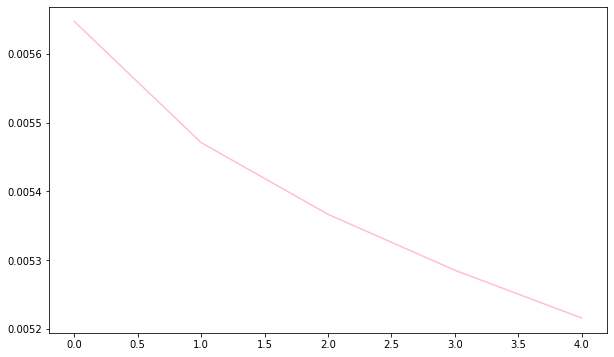

In [16]:
# Plot 
plt.figure(figsize=(10, 6))
df = pd.read_csv('content/skip_gram_training_loss.csv')
plt.plot(df['epoch'],df['train_loss'],color = 'pink', label='Training loss')

### Word analogy

In [25]:
def word_analogy(model_path, vocab_path, word1, word2, word3):
    # Load the trained word embedding model and vocabulary
    W1 = torch.load(model_path)
    vocabulary = torch.load(vocab_path)

    # Get the indices of the three input words
    try:
      indices = [vocabulary.index(word.lower()) for word in [word1.lower(), word2.lower(), word3.lower()]]
    except:
      return None
    # Convert the input words to dense embedding vectors
    x1 = W1[:, indices[0]]
    x2 = W1[:, indices[1]]
    x3 = W1[:, indices[2]]

    # Compute the vector difference and add it to the fourth word's vector
    x4 = x2 - x1 + x3
    print(x4)
    # Find the index of the closest word to the resulting vector
    sim_scores = torch.matmul(W1.T, x4)
    _, closest_word_idx = sim_scores.max(dim=0)

    # Return the closest word
    closest_word = vocabulary[closest_word_idx]
    return closest_word

In [35]:
word_analogy('content/embedding_weights.pt','content/vocabulary.pkl','cash','bank','money')

tensor([ 1.6587, -0.9130, -1.7776,  1.2808, -2.4178, -1.8317,  0.7058, -1.1076,
        -1.4333, -0.2983, -0.3548,  1.3404,  2.1815, -2.8978,  0.9021, -3.4068,
        -2.6570,  1.7988, -0.0355, -0.1161,  2.0333, -0.0257,  1.8281, -0.3801,
         0.2266, -0.9656,  0.2546, -0.1516,  4.1168, -0.3922, -0.0986,  0.1572,
        -1.4179,  0.0489,  3.6452, -4.0343, -1.0422, -0.2144,  2.0721,  1.9454,
        -1.3409, -0.9607, -2.7030, -1.1126,  1.4479, -0.4242,  1.3730, -0.6959,
         0.7685, -0.5063,  0.3442,  0.7361, -0.7204,  0.7242, -2.7095, -2.0312,
         0.7206, -0.9392, -1.1173, -1.4623, -1.1496,  1.5866,  0.8818,  2.3637,
         1.8047,  2.5201,  3.5334, -1.7056,  0.5423,  2.4502,  1.5773, -1.2409,
         2.5725,  3.2447,  2.3903,  3.2573, -2.1807,  0.7387,  1.1773,  0.8024,
         0.5141,  0.8563, -2.0222,  1.4100,  3.7898,  2.7276, -3.3494,  2.0846,
         0.7336,  2.4868, -1.1091,  0.5554,  1.6864, -0.7966, -2.8555, -0.1245,
        -1.4982, -1.7115,  3.1966, -0.63

'bank'

### Plot embeddings

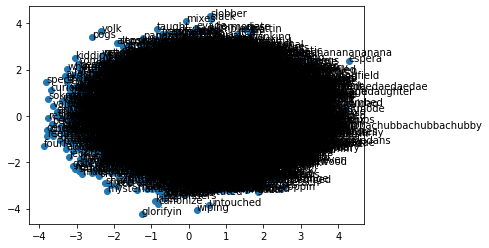

In [19]:
# Load the trained word embedding model and vocabulary
W1 = torch.load('content/embedding_weights.pt')
vocabulary = torch.load('content/vocabulary.pkl')

# Convert the embedding matrix to a numpy array
W1_np = W1.detach().cpu().numpy()

# Use PCA to reduce the dimensionality of the embeddings to 2D
pca = PCA(n_components=2)
W1_2d = pca.fit_transform(W1_np.T)

# Plot the embeddings in 2D space
fig, ax = plt.subplots()
ax.scatter(W1_2d[:, 0], W1_2d[:, 1])

# Add word labels to the plot
for i, word in enumerate(vocabulary):
    ax.annotate(word, (W1_2d[i, 0], W1_2d[i, 1]))

plt.show()

/Users/macbook_pro/Documents/GitHub/lyrics-sentiment-analysis/venv/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:501: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


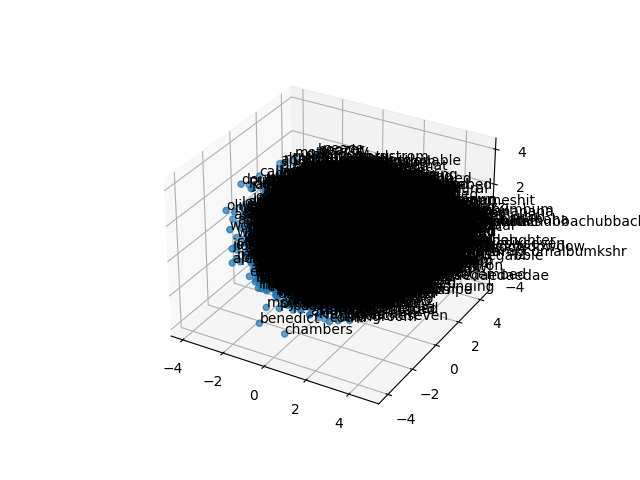

In [54]:
W1 = torch.load('content/embedding_weights.pt', map_location=torch.device(device))
vocabulary = torch.load('content/vocabulary.pkl')

W1_np = W1.detach().cpu().numpy()

# Use PCA to reduce the dimensionality of the embeddings to 3D
pca = PCA(n_components=3)
W1_3d = pca.fit_transform(W1_np.T)

# Plot the embeddings in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(W1_3d[:, 0], W1_3d[:, 1], W1_3d[:, 2])

# Add word labels to the plot
for i, word in enumerate(vocabulary):
    ax.text(W1_3d[i, 0], W1_3d[i, 1], W1_3d[i, 2], word)

# Add interactive zooming
def on_move(event):
    if event.inaxes == ax:
        ax.format_coord = lambda x, y: f"x={x:.2f}, y={y:.2f}, z={ax.get_zlim()}"
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_move)
# plt.xlim(0.3, 1.0)
# plt.ylim(0.3, 1.0)
plt.show()

In [102]:
from collections import Counter

# Create a Counter object with some frequencies
freq = Counter(torch.load('content/vocabulary.pkl'))

# Convert frequency values to range [0, 1]
total_count = sum(np.array(list(freq.values())))
freq = {word: count / total_count for word, count in freq.items()}

# Save frequency dictionary to JSON file
with open('content/freq.json', 'w') as f:
    json.dump(freq, f)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# Load the trained word embedding model and vocabulary
W1 = torch.load('content/embedding_weights.pt', map_location=torch.device(device))
vocabulary = torch.load('content/vocabulary.pkl')

vocab= ['car','watches','money','bank','cards','happiness', 'gucci','prada','chanel','clothes','loot']
vocabulary_indices = []
for word in vocab:
    vocabulary_indices.append(vocabulary.index(word))


W1_vocabulary = W1[:,vocabulary_indices]

# Convert the embedding matrix to a numpy array
W1_np = W1_vocabulary.detach().cpu().numpy()

# Use PCA to reduce the dimensionality of the embeddings to 3D
pca = PCA(n_components=3)
W1_3d = pca.fit_transform(W1_np.T)

# Plot the embeddings in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(W1_3d[:, 0], W1_3d[:, 1], W1_3d[:, 2])

# Add word labels to the plot
for i, word in enumerate(vocabulary):
    if i in vocabulary_indices:
        ax.text(W1_3d[vocabulary_indices.index(i), 0],
                W1_3d[vocabulary_indices.index(i), 1],
                W1_3d[vocabulary_indices.index(i), 2], word)
# plt.xlim(2.3, 1.0)
# plt.ylim(2.3, 1.0)
plt.show()
mpld3.enable_notebook()

<IPython.core.display.Javascript object>

In [106]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
W1 = torch.load('content/embedding_weights.pt', map_location=torch.device(device))
vocabulary = torch.load('content/vocabulary.pkl')
with open('content/freq.json', 'r') as f:
    frequency = json.load(f)

In [107]:
def compute_sentence_embedding(sentence, model=W1, vocab=vocabulary,freq = frequency):
    # Tokenize the sentence into words
    words = sentence.split()

    # Get the embeddings for each word in the sentence
    word_embeddings = []
    for word in words:
        try:
            word_embeddings.append(model[:, vocab.index(word)].detach().numpy()*frequency[word])
        except:
            word_embeddings.append(np.zeros(EMBEDDING_DIMS))

    # Compute the sentence embedding as the mean of the word embeddings
    if word_embeddings:
        sentence_embedding = np.mean(word_embeddings, axis=0)
    else:
        sentence_embedding = np.zeros(EMBEDDING_DIMS)

    return sentence_embedding



In [108]:
def emb_str(lyrics):
    return np.array2string(compute_sentence_embedding(lyrics), separator=' ')


In [109]:
df = pd.read_csv('content/cleaned_songs.csv')
df['Embeddings'] = df['Cleaned Lyrics'].apply(emb_str)
df.to_csv('content/cleaned_songs.csv', index=False)
df = pd.read_csv('content/cleaned_songs.csv')
df = df.dropna(subset=['Popularity'])
df.to_csv('content/spotify_songs.csv', index=False)

### Simple logreg to predict future hit

In [110]:
df = pd.read_csv('content/spotify_songs.csv')
embeddings = df['Embeddings'].apply(lambda x: np.fromstring(x.replace("[", "").replace("]", ""), sep=' ')).values
print(embeddings[0])

# np.array2string(array, separator=' ')
# np.fromstring(array_string

[ 3.19238933e-06 -2.18537999e-06 -9.09801844e-07 -1.63161664e-06
 -2.96824584e-07  6.46391759e-06 -2.38757297e-06 -5.98682854e-06
  3.24778195e-06 -5.31753868e-06 -4.79230578e-06 -2.31369397e-06
  2.14098264e-06  1.19914551e-06 -4.92329406e-06 -4.49102267e-06
  1.15721085e-05 -5.08610945e-07 -2.96899377e-06  4.23258561e-06
 -4.97180940e-06 -3.96580615e-06  3.18282357e-07  5.41152252e-06
 -7.88903238e-06 -6.37070236e-06  3.64761673e-06 -2.32668839e-06
 -1.14329933e-06  2.15234351e-06 -2.65841965e-06  2.31920040e-06
  4.91723953e-07 -6.43405310e-07 -2.24007523e-06 -4.32831242e-07
 -2.65281760e-06 -1.38000413e-06  3.35325480e-06 -1.85804447e-06
 -5.40569851e-06  4.47712130e-06  3.42195985e-06  5.04224892e-06
 -7.80263293e-07 -1.13726225e-06 -9.72951487e-07  1.28197216e-07
 -3.29460826e-07 -6.53001528e-07  7.96333474e-07 -8.45614168e-06
 -6.49281389e-06  3.19607899e-06 -1.06894126e-06  4.65236211e-06
  9.77959710e-07 -3.46800621e-06  1.44756455e-06 -3.55036527e-07
 -2.80330531e-06  2.23480

In [111]:
emb = np.array([np.array(e) for e in embeddings])

In [112]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
l = np.array(df['Popularity'].values/df['Popularity'].max())
l[l > 0.5] = 1
l[l <= 0.5] = 0
labels = lab.fit_transform(l)
# labels = labels.tolist()
X_train, X_test, y_train, y_test = train_test_split(emb, labels, test_size=0.15, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)

# Save the model to a file using pickle
with open('content/logreg_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [113]:
print(accuracy)

0.674457429048414


In [119]:
# Load the saved model from file
with open('content/logreg_model.pkl', 'rb') as f:
    logreg_model = pickle.load(f)

# Use the loaded model to make predictions
predictions = logreg_model.predict(compute_sentence_embedding('la la la').reshape(1, -1))

In [120]:
print(predictions[0])

1


## Markov chain to generate lyrics

In [87]:
def clean(lyrics):
    lyrics = ' '.join([re.sub(r"embed$", "", e) for e in lyrics.split(' ')])
    return  lyrics

In [121]:
# take 500 random songs
tokenized_corpus = pd.read_csv('content/cleaned_songs.csv').sample(frac=1)['Tokenized Lyrics'][:500].apply(clean).tolist()

In [122]:
text_model = markovify.Text(tokenized_corpus, state_size=3)
text_model = text_model.compile()
# Save the JSON to disk, and then read it back later.
model_json = text_model.to_json()

In [123]:
text_model = text_model.compile()

In [124]:
with open('content/markovify_text_model.pkl', 'wb') as f:
    pickle.dump(text_model, f)

In [125]:
with open('content/markovify_model.json', 'w') as f:
  json.dump(model_json, f, ensure_ascii=False)

#### DISCLAIMER: IT'S POSSIBLE TO GENERATE PROFANITY IN TEXT!!!

In [127]:
# Read JSON file
with open('content/markovify_model.json') as f:
    model_json = json.load(f)

In [129]:
reconstructed_model = markovify.Text.from_json(model_json)
reconstructed_model.make_short_sentence(100)

'double up three or four times i ain t sorry i ain t make it on your own'

## Telegram Bot

In [14]:
load_dotenv(os.path.join(os.getcwd(),'.env'))
TELEGRAM_BOT_TOKEN = os.environ.get('TELEGRAM_BOT_TOKEN')

In [32]:
bot = telebot.TeleBot(TELEGRAM_BOT_TOKEN)

In [45]:
# Load the saved model from file
with open('content/logreg_model.pkl', 'rb') as f:
    logreg_model = pickle.load(f)
with open('content/markovify_text_model.pkl', 'rb') as f:
    reconstructed_model = pickle.load(f)

In [33]:
# This function sends the disclaimer message to the user
@bot.message_handler(commands=['start'])
def send_disclaimer(message):
    disclaimer_text = "Welcome to the Singer Bot!\nThis bot is for demonstration purposes only.\nThis bot was created to generate lyrics, but it is possible that it will send toxic and profanity content.\nTo generate lyrics write 'lyrics'"
    bot.send_message(message.chat.id, text=disclaimer_text)

# This function sends lyrics
@bot.message_handler(func=lambda message: True)
def send_lyrics(message):
    if fuzz.token_sort_ratio(message.text,'lyrics')>85:
        msg = ""
        while True:
            msg = reconstructed_model.make_short_sentence(150)
            if logreg_model.predict(compute_sentence_embedding(msg).reshape(1, -1))>0.8:
                break
        if msg:
            bot.send_message(message.chat.id,text=msg)
        else:
            bot.send_message(message.chat.id,text='Write me again!')
    else:
        bot.send_message(message.chat.id, "Write 'lyrics' to generate lyrics!")

In [46]:
# Start the bot
bot.polling()